https://arxiv.org/pdf/2211.10295.pdf

# 1 Initialize

In [1]:
#%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics"
%cd "/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics"

/mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore
from GMetrics.plotters import cornerplotter, plot_corr_matrix # type: ignore

sys.path.insert(0,'utils_func/')
import MixtureDistributions # type: ignore
from optimizers_unimodal import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/5D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-24 18:33:43.066065: Importing os...
2024-04-24 18:33:43.066324: Importing sys...
Visible devices: [0]
2024-04-24 18:33:43.066932: Importing timer from timeit...
2024-04-24 18:33:43.067107: Setting env variables for tf import (only device(s) [0] will be available)...
2024-04-24 18:33:43.067436: Importing numpy...
2024-04-24 18:33:43.215705: Importing matplotlib...
2024-04-24 18:33:43.747191: Importing h5py...
2024-04-24 18:33:43.768720: Importing importlib.util...
2024-04-24 18:33:43.768826: Importing json...
2024-04-24 18:33:43.768903: Importing pandas...
2024-04-24 18:33:44.056093: Importing random...
2024-04-24 18:33:44.056254: Importing scipy utils...
2024-04-24 18:33:44.400907: Importing subprocess...
2024-04-24 18:33:44.401056: Importing tensorflow...
Tensorflow version: 2.12.0
2024-04-24 18:33:46.512322: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-24 18:33:46.830187: Importing timeit...
2024-04-24 18:33:46.830284: Importing tqdm...
2

# Distributions

In [3]:
tfb = tfp.bijectors

def MixMultiNormal(ncomp: int = 3,
                   ndims: int = 4,
                   loc_factor = 1.,
                   scale_factor = 1.,
                   dtype = tf.float64,
                   seed: int = 0
                  ) -> tfp.distributions.Mixture:
    GMetrics.utils.reset_random_seeds(seed)
    loc: tf.Tensor = tf.random.uniform([ncomp, ndims], 
                                       minval = -loc_factor, 
                                       maxval = loc_factor, 
                                       dtype = dtype)
    scale: tf.Tensor = tf.random.uniform([ncomp, ndims], 
                                         minval = 0, 
                                         maxval = scale_factor, 
                                         dtype = dtype)
    probs: tf.Tensor = tf.random.uniform([ncomp], 
                                         minval = 0, 
                                         maxval = 1, 
                                         dtype = dtype)
    components: List[tfp.distributions.MultivariateNormalDiag] = []
    for i in range(ncomp):
        components.append(tfp.distributions.MultivariateNormalDiag(loc = loc[i], scale_diag = scale[i]))
    mix_gauss: tfp.distributions.Mixture = tfp.distributions.Mixture(
        cat = tfp.distributions.Categorical(probs = probs),
        components = components,
        validate_args = True)
    return mix_gauss

def MultiNormalFromMix(ncomp: int = 3,
                       ndims: int = 4,
                       loc_factor = 1.,
                       scale_factor = 1.,
                       dtype = tf.float64,
                       seed: int = 0,
                       nsamples: int = 100_000
                      ) -> tfp.distributions.MultivariateNormalTriL: 
    GMetrics.utils.reset_random_seeds(seed)
    loc: tf.Tensor = tf.random.uniform([ndims], 
                                       minval = -loc_factor,
                                       maxval = loc_factor, 
                                       dtype = dtype)
    mix = MixMultiNormal(ncomp = ncomp,
                         ndims = ndims,
                         loc_factor = loc_factor,
                         scale_factor = scale_factor,
                         dtype = dtype,
                         seed = seed)
    samp = tf.cast(mix.sample(nsamples), dtype = dtype)
    covariance_matrix = tfp.stats.covariance(samp, sample_axis = 0)
    scale: tf.Tensor = tf.linalg.cholesky(covariance_matrix) # type: ignore
    mvn = tfp.distributions.MultivariateNormalTriL(loc = loc, scale_tril = scale)
    return mvn

def deform_mean(distribution,
                eps = 0.,
                seed: int = 0):
    GMetrics.utils.reset_random_seeds(seed)
    if eps < 0:
        raise ValueError("Epsilon must be non-negative")
    shape = distribution.mean().shape
    dtype = distribution.mean().dtype
    shift_vector = tf.random.uniform(shape, 
                                     minval = -eps, 
                                     maxval = eps, 
                                     dtype = dtype)
    deformed_dist = tfd.TransformedDistribution(distribution = distribution, 
                                                bijector = tfb.Shift(shift = shift_vector))
    return deformed_dist

def deform_cov_diag(distribution, 
                    eps=0.,
                    seed: int = 0):
    GMetrics.utils.reset_random_seeds(seed)
    if eps < 0.:
        raise ValueError("Epsilon must be non-negative")
    shape = distribution.mean().shape
    dtype = distribution.mean().dtype
    scale_vector = tf.random.uniform(shape, minval=1., maxval=1. + eps, dtype=dtype)
    original_mean = distribution.mean()
    shift_to_zero = tfb.Shift(-original_mean)  # Shift distribution so mean is at zero
    scale = tfb.Scale(scale_vector)            # Scale the distribution
    shift_back = tfb.Shift(original_mean)      # Shift distribution back to original mean
    chained_bijector = tfb.Chain([shift_back, scale, shift_to_zero])
    deformed_dist = tfd.TransformedDistribution(distribution=distribution, 
                                                bijector=chained_bijector)
    return deformed_dist

def modify_covariance_matrix(original_covariance, eps):
    if eps < 0:
        raise ValueError("Epsilon must be non-negative")
    dtype = original_covariance.dtype
    shape = original_covariance.shape[0]
    std_devs = tf.sqrt(tf.linalg.diag_part(original_covariance))
    modified_std_devs_diag = std_devs / tf.maximum(tf.constant(1.0, dtype=dtype), tf.constant(eps, dtype=dtype))
    modified_std_devs_off_diag = std_devs * tf.maximum(tf.constant(0.0, dtype=dtype), tf.constant(1 - eps, dtype=dtype))
    correlation_matrix = original_covariance / (std_devs[:, None] * std_devs[None, :])
    modified_diag = tf.linalg.diag(modified_std_devs_diag**2)
    outer_std_devs = modified_std_devs_off_diag[:, None] * modified_std_devs_off_diag[None, :]
    modified_off_diag = correlation_matrix * outer_std_devs
    diagonal_mask = tf.linalg.diag(tf.ones(shape, dtype=dtype))
    modified_off_diag = modified_off_diag * (1 - diagonal_mask)
    modified_covariance = modified_diag + modified_off_diag
    print("Original Covariance:\n", original_covariance)
    print("Modified Covariance:\n", modified_covariance)
    return modified_covariance

def deform_cov_off_diag(distribution,
                        eps = 0.,
                        nsamples: int = 1_000_000):
    if eps < 0.:
        raise ValueError("Epsilon must be non-negative")
    dtype = distribution.mean().dtype
    samp = tf.cast(distribution.sample(nsamples), dtype = dtype)
    original_covariance = tfp.stats.covariance(samp, sample_axis = 0)
    modified_covariance = modified_covariance = modify_covariance_matrix(original_covariance, eps)
    chol_original = tf.linalg.cholesky(original_covariance)
    chol_modified = tf.linalg.cholesky(modified_covariance)
    transformation_matrix = tf.linalg.triangular_solve(chol_original, chol_modified)
    original_mean = distribution.mean()
    shift_to_zero = tfb.Shift(-original_mean)
    linear_transform = tfb.ScaleMatvecTriL(scale_tril=transformation_matrix)
    shift_back = tfb.Shift(original_mean)
    chained_bijector = tfb.Chain([shift_back, linear_transform, shift_to_zero])
    deformed_dist = tfd.TransformedDistribution(distribution=distribution, bijector=chained_bijector)
    return deformed_dist

def compute_skewness(data, 
                     axis=None, 
                     keepdims=False):
    mean = tf.reduce_mean(data, axis=axis, keepdims=True)
    third_moment = tf.reduce_mean(tf.pow(data - mean, 3), axis=axis, keepdims=keepdims)
    std_dev = tf.math.reduce_std(data, axis=axis, keepdims=True)
    skewness = third_moment / tf.pow(std_dev, 3)
    return skewness

class AbsPowerTransform(tfb.Bijector):
    def __init__(self, power = 1., validate_args=False, name="sign_safe_power_transform"):
        super(AbsPowerTransform, self).__init__(forward_min_event_ndims=0, validate_args=validate_args, name=name)
        self.power = power

    def _forward(self, x):
        # Apply power transformation only to the absolute value and keep the sign
        return tf.sign(x) * tf.pow(tf.abs(x), self.power)

    def _inverse(self, y):
        # Inverse transformation, assuming y has the same sign as x
        return tf.sign(y) * tf.pow(tf.abs(y), 1. / self.power)

    def _forward_log_det_jacobian(self, x):
        # Logarithm of the absolute value of the derivative of the forward transformation
        return (self.power - 1) * tf.math.log(tf.abs(x)) + tf.math.log(tf.abs(self.power))
    
def deform_power_abs_up(distribution,
                        eps = 0.):
    if eps < 0.:
        raise ValueError("Epsilon must be non-negative")
    deformation = AbsPowerTransform(power = 1 + eps)
    deformed_dist = tfd.TransformedDistribution(distribution = distribution, 
                                                bijector = deformation)
    return deformed_dist

def deform_power_abs_down(distribution,
                          eps = 0.):
    if eps < 0.:
        raise ValueError("Epsilon must be non-negative")
    deformation = AbsPowerTransform(power = 1 - eps)
    deformed_dist = tfd.TransformedDistribution(distribution = distribution, 
                                                bijector = deformation)
    return deformed_dist

class RandomShift(tfb.Bijector):
    def __init__(self, scale=0.1, shift_dist="normal", validate_args=False, name="random_shift"):
        super(RandomShift, self).__init__(forward_min_event_ndims=0, validate_args=validate_args, name=name)
        self.scale = scale
        if shift_dist in ["normal", "uniform"]:
            self.shift_dist = shift_dist
        else:
            raise ValueError("shift_dist must be either 'normal' or 'uniform'")

    def _forward(self, x):
        # Ensuring that the random shift has the same dtype as the input x
        if self.shift_dist == "normal":
            shift = tf.random.normal(shape=tf.shape(x), stddev=self.scale, dtype=x.dtype)
        elif self.shift_dist == "uniform":
            shift = tf.random.uniform(shape=tf.shape(x), minval=-self.scale, maxval=self.scale, dtype=x.dtype)
        return x + shift

    def _inverse(self, y):
        # This is not truly correct as we don't know the original shift
        raise NotImplementedError("Inverse is not well defined for random shifts.")

    def _forward_log_det_jacobian(self, x):
        # The log determinant of the Jacobian for a pure shift is zero
        return tf.zeros_like(x)

def deform_random(distribution,
                  eps = 0.,
                  shift_dist = "normal",
                  seed: int = 0):
    GMetrics.utils.reset_random_seeds(seed)
    if eps < 0:
        raise ValueError("Epsilon must be non-negative")
    deformation = RandomShift(scale = eps,
                              shift_dist = shift_dist)
    deformed_dist = tfd.TransformedDistribution(distribution = distribution, 
                                                bijector = deformation)
    return deformed_dist

In [26]:
ncomp = 3
ndims = 5
eps = 0.1
seed = 0
dist_1 = MixMultiNormal(ncomp = ncomp,
                        ndims = ndims,
                        loc_factor = 10.,
                        scale_factor = 1.,
                        dtype = tf.float64,
                        seed = seed)
#dist_1 = MultiNormalFromMix(ncomp = ncomp,
#                            ndims = ndims,
#                            loc_factor = 10.,
#                            scale_factor = 1.,
#                            dtype = tf.float64,
#                            seed = seed,
#                            nsamples = 100_000)
#dist_def_1 = deform_mean(dist_1, 
#                         eps = eps,
#                         seed = seed)
#dist_def_2 = deform_cov_diag(dist_1, 
#                             eps = eps,
#                             seed = seed)
#dist_def_3 = deform_cov_off_diag(dist_1, 
#                                 eps = eps,
#                                 nsamples = 100_000)
dist_def_4 = deform_power_abs_up(dist_1,
                                 eps = eps)
#dist_def_5 = deform_power_abs_down(dist_1,
#                                   eps = eps)
#dist_def_6 = deform_random(dist_1,
#                           eps = 0.5,
#                           shift_dist = "normal",
#                           seed = 0)
#dist_def_7 = deform_random(dist_1,
#                           eps = 0.5,
#                           shift_dist = "uniform",
#                           seed = 0)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
#print('loc1:', loc1)
#print('scale1:', scale1)
print('Dist 1 first sample:', dist_1.sample())
#print('loc2:', loc2)
#print('scale2:', scale2)
print('Dist 2 first sample:', dist_2.sample())

Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.transformed_distribution._TransformedDistribution'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)
Dist 1 first sample: tf.Tensor([-3.00271415 -5.55410669 -3.32879462  8.86921305  1.17630168], shape=(5,), dtype=float64)
Dist 2 first sample: tf.Tensor([-2.82654874 -5.32763907 -2.96067259 10.596653   -0.180545  ], shape=(5,), dtype=float64)


In [27]:
nsamples = 1_000_000
#print([dist_1.mean(),dist_2.mean()])
s1 = dist_1.sample(nsamples)
s2 = dist_2.sample(nsamples)
print([tf.math.reduce_mean(s1, axis = 0),tf.math.reduce_mean(s2, axis = 0)])
print([tf.math.reduce_std(s1, axis = 0),tf.math.reduce_std(s2, axis = 0)])

[<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 0.02001192,  0.33495447, -2.69361564, -0.4225286 ,  1.95254632])>, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 0.01789771,  0.32870611, -2.69466755, -0.40942037,  1.95220532])>]
[<tf.Tensor: shape=(5,), dtype=float64, numpy=array([3.80786784, 3.6596007 , 0.96325166, 6.74676135, 2.01228648])>, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([3.83878355, 3.69311576, 1.08472073, 6.76763538, 2.07254843])>]


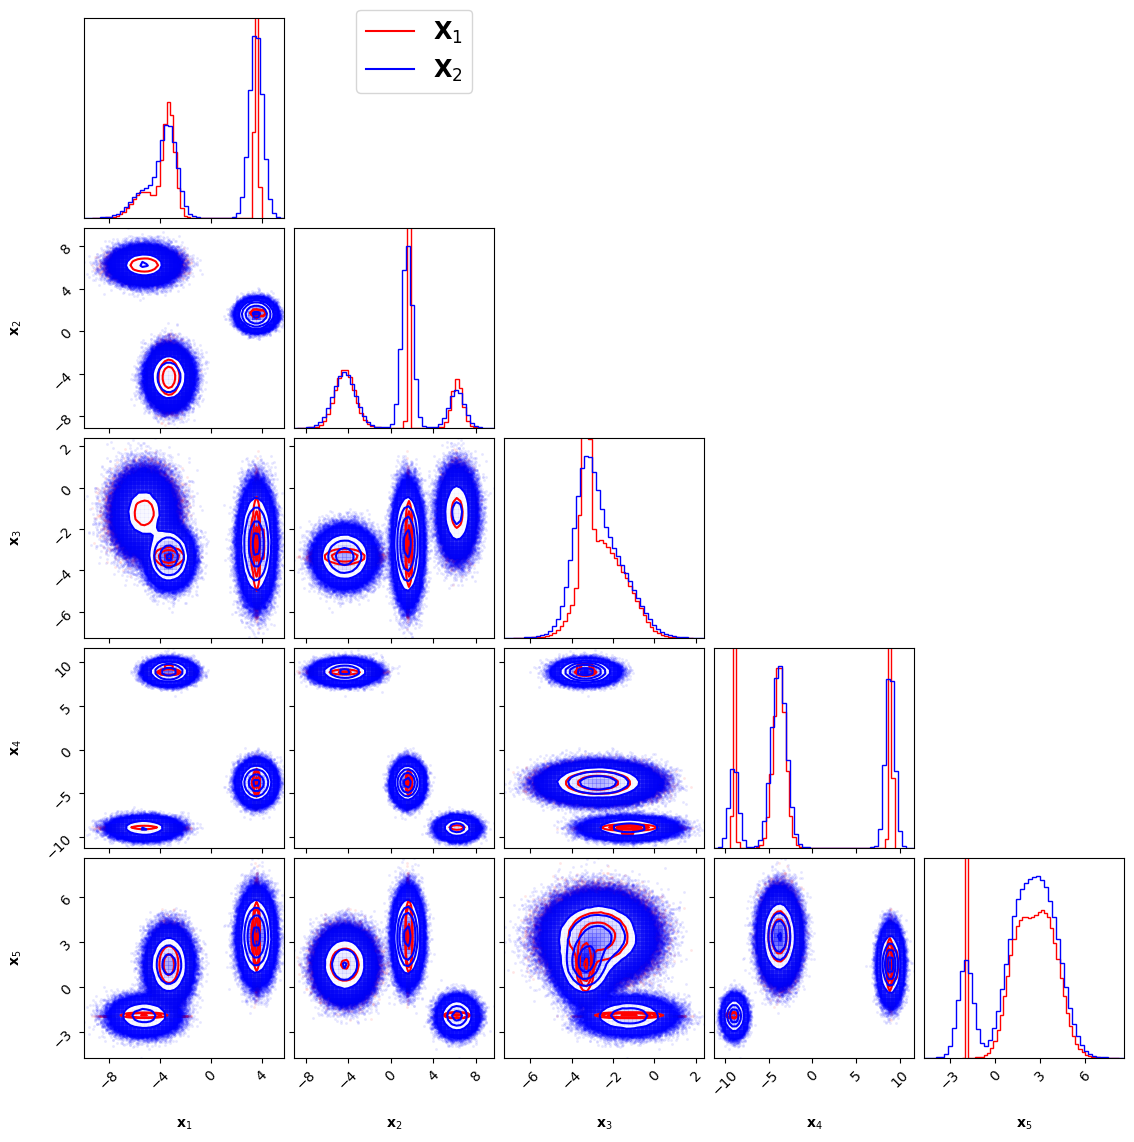

In [28]:
cornerplotter(dist_1 = dist_1, 
              dist_2 = dist_2, 
              path_to_plots = results_dir, 
              max_points = nsamples,
              max_dim = 32,
              n_bins = 50,
              show = True,
              save = False)

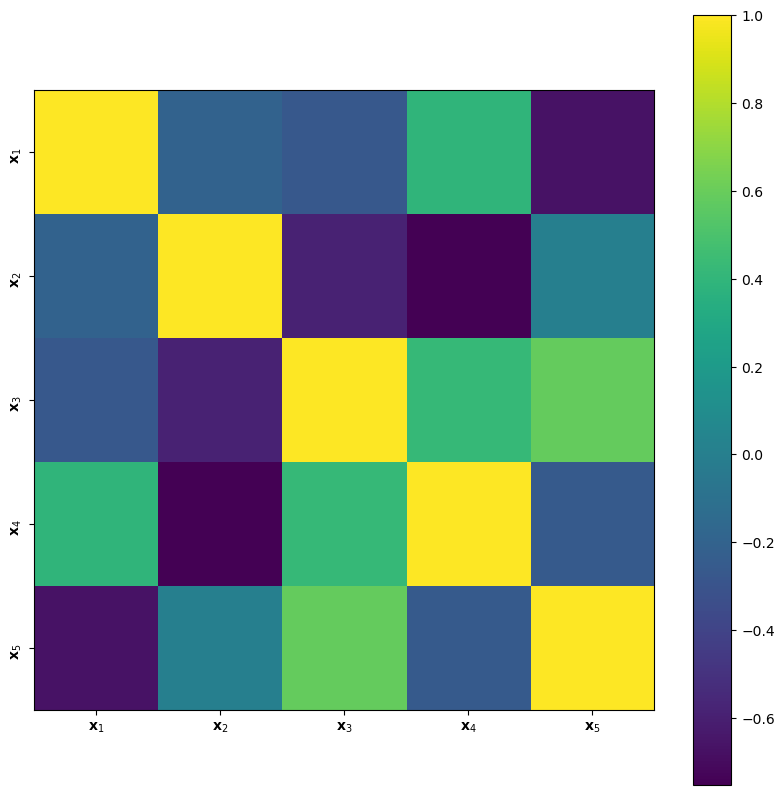

In [19]:
plot_corr_matrix(dist = dist_1,
                 path_to_plots = results_dir,
                 max_points = 1_000_000,
                 show_labels = True,
                 show = True,
                 save = False)

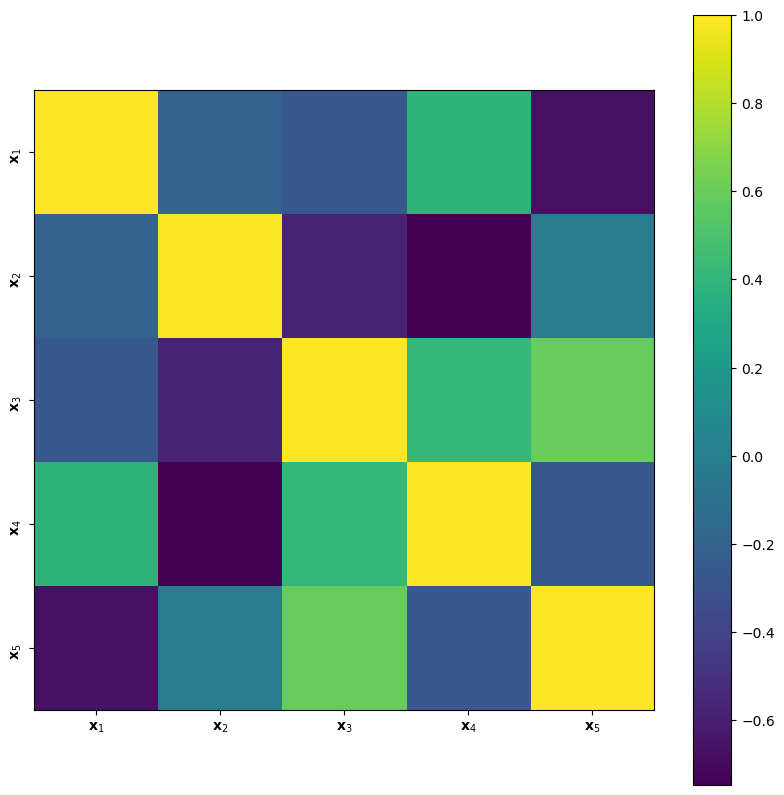

In [20]:
plot_corr_matrix(dist = dist_2,
                 path_to_plots = results_dir,
                 max_points = 1_000_000,
                 show_labels = True,
                 show = True,
                 save = False)

# 2.1 Define distribution

In [2]:
#seed = 0
#ndims = 5
#epsilon = 0.005
#GMetrics.utils.reset_random_seeds(seed)
#loc1 = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
#scale1 = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
#loc2 = np.array(np.random.unifo                    rm(-epsilon,epsilon,ndims),dtype=np.float64)
#scale2 = np.array(np.random.uniform(1-epsilon,1+epsilon,ndims),dtype=np.float64)
#dist_1 = tfd.Independent(tfp.distributions.Normal(loc=loc1, scale=scale1), reinterpreted_batch_ndims=1)
#dist_2 = tfd.Independent(tfp.distributions.Normal(loc=loc2, scale=scale2), reinterpreted_batch_ndims=1)
#print(dist_1.dtype, dist_2.dtype)
#print('Types of distributions: ', type(dist_1), type(dist_2))
#print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
#print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
#print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

In [29]:
#ncomp = 5
#ndims = 50
#seed = 0
#epsilon = 0.005
#tf.random.set_seed(seed)
#np.random.seed(seed)
#loc1 = np.array(np.zeros([ncomp,ndims],dtype=np.float64),dtype=np.float64)
#scale1 = np.array(np.ones([ncomp,ndims],dtype=np.float64),dtype=np.float64)
#loc2 = np.array(np.random.uniform(-epsilon,epsilon,[ncomp,ndims]),dtype=np.float64)
#scale2 = np.array(np.random.uniform(-epsilon,epsilon,[ncomp,ndims]),dtype=np.float64)
#comp1 = []
#for i in range(ncomp):
#    comp1.append(tfd.MultivariateNormalDiag(loc=loc1[i],scale_diag=scale1[i]))
#comp2 = []
#for i in range(ncomp):
#    comp2.append(tfd.MultivariateNormalDiag(loc=loc2[i],scale_diag=scale2[i]))
#probs = np.random.sample(ncomp)
#dist_1 = tfd.Mixture(
#            cat=tfd.Categorical(probs = probs),
#            components = comp1,
#            validate_args = True)
#dist_2 = tfd.Mixture(
#            cat=tfd.Categorical(probs = probs),
#            components = comp2,
#            validate_args = True)
#print('Types of distributions: ', type(dist_1), type(dist_2))
#print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
#print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
#print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
##print('loc1:', loc1)
##print('scale1:', scale1)
#print('Dist 1 first sample:', dist_1.sample())
##print('loc2:', loc2)
##print('scale2:', scale2)
#print('Dist 2 first sample:', dist_2.sample())

# Small samples

## Numpy backend


In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 60,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = False,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
nsamples 600000
batch_size 10000
niter 60
niter * batch_size 600000
small_sample False


In [ ]:
print(TwoSampleTestInputs.dist_1_num.shape)
TwoSampleTestInputs.dist_1_num

(1, 0)


<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [ ]:
print(TwoSampleTestInputs.dist_2_num.shape)
TwoSampleTestInputs.dist_2_num

(1, 0)


<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
                                   progress_bar = True,
                                   verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)

To run under the null hypothesis, set the `null_test` attribute to True.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


### FN Test

In [ ]:
FNMetric.Test_np()
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
niter = 10
batch_size = 10000


Iterations: 100%|██████████| 10/10 [00:00<00:00, 644.10it/s]

Running numpy FN calculation...
Two-sample test calculation completed in 0.019357786048203707 seconds.


{'metric_list': array([0.06381937, 0.08351717, 0.06816056, 0.0653649 , 0.06554995,
        0.04301747, 0.08694649, 0.06473251, 0.03918382, 0.05991245])}

### FPD Test

In [ ]:
FPDMetric.Test_np()
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
niter = 50
batch_size = 10000


Iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Running numpy FPD calculation...


/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/jetnet/evaluation/gen_metrics.py:692: RuntimeWarning: Recommended number of samples for FPD estimation is 50,000
  warnings.warn("Recommended number of samples for FPD estimation is 50,000", RuntimeWarning)
Iterations: 100%|██████████| 50/50 [01:13<00:00,  1.48s/it]

Two-sample test calculation completed in 73.96762272622436 seconds.


{'metric_list': array([0.00059462, 0.00053794, 0.00040956, 0.00064115, 0.00080315,
        0.00070297, 0.00049225, 0.00053261, 0.00047138, 0.00053657,
        0.00052496, 0.00056957, 0.00052007, 0.00058059, 0.00051315,
        0.00053657, 0.0005367 , 0.00048323, 0.00064603, 0.00047729,
        0.00046198, 0.00067001, 0.00052703, 0.00064577, 0.00060665,
        0.00051659, 0.00061184, 0.00068384, 0.00068339, 0.00070991,
        0.00081032, 0.0005947 , 0.00060446, 0.00087497, 0.00083115,
        0.00055821, 0.00067274, 0.00058977, 0.00070849, 0.00054938,
        0.00057666, 0.00063016, 0.00055271, 0.00054565, 0.00063727,
        0.00049313, 0.00051098, 0.00059691, 0.00063618, 0.00070682]),
 'metric_error_list': array([3.56198377e-05, 5.39869287e-05, 6.74936681e-05, 5.50909118e-05,
        5.87129561e-05, 3.60945411e-05, 4.31497924e-05, 4.32694541e-05,
        3.18269884e-05, 4.41094123e-05, 4.84271857e-05, 4.92312631e-05,
        4.43241476e-05, 3.20262903e-05, 4.68172734e-05, 4.96849608

### KPD Test

In [ ]:
KPDMetric.Test_np()
KPDMetric.Results[-1].result_value


------------------------------------------
Starting KPD metric calculation...
niter = 50
batch_size = 10000


Iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Running numpy KPD calculation...


Iterations: 100%|██████████| 50/50 [06:24<00:00,  7.69s/it]

Two-sample test calculation completed in 384.6957740802318 seconds.


{'metric_list': array([ 4.32031227e-05,  8.26072666e-05,  1.22972332e-05,  3.64633557e-05,
         5.02345938e-05,  9.18118753e-05,  1.56355114e-05,  2.10206197e-05,
         6.38994689e-05,  3.49118030e-05,  3.37585205e-05,  7.53087457e-05,
         1.10760533e-05,  1.30421198e-05,  1.60110365e-05,  5.22596257e-05,
         5.81810802e-05,  5.12988683e-05, -3.38207461e-07,  4.17953762e-05,
         5.86508462e-06,  1.90541722e-05,  2.98514123e-05,  1.75193364e-05,
         6.02353326e-05,  2.06102627e-05,  2.07162696e-05,  2.15602384e-05,
         6.72583692e-05,  7.37307378e-05,  3.30799464e-05,  6.07437586e-05,
         1.17971418e-06,  1.16706598e-04,  1.11684587e-04,  1.44129106e-04,
         7.37898218e-05,  3.37431195e-05,  8.02723360e-05,  2.67154935e-05,
         2.03227416e-05,  8.15390440e-05,  3.93504484e-05,  6.10074052e-05,
         2.29975252e-05,  1.64389315e-05,  3.14678058e-05,  6.47265832e-05,
         6.13400822e-05,  8.60206652e-05]),
 'metric_error_list': array([

### KS Test

In [ ]:
KSTest.Test_np()
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
niter = 10
batch_size = 10000


Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

Running numpy KS tests...


Iterations: 100%|██████████| 10/10 [00:00<00:00, 45.58it/s]

Two-sample test calculation completed in 0.22124550910666585 seconds.


{'statistic_lists': array([[0.0134, 0.0132, 0.0187, 0.0096, 0.013 ],
        [0.0096, 0.007 , 0.0207, 0.0158, 0.0141],
        [0.0074, 0.0114, 0.0119, 0.0207, 0.0136],
        [0.0076, 0.0155, 0.0091, 0.02  , 0.0156],
        [0.0053, 0.0104, 0.009 , 0.0077, 0.0094],
        [0.0168, 0.0079, 0.009 , 0.0088, 0.0144],
        [0.0122, 0.0154, 0.0121, 0.0083, 0.0149],
        [0.0136, 0.0076, 0.0099, 0.014 , 0.0148],
        [0.0087, 0.0117, 0.0093, 0.0137, 0.0142],
        [0.0082, 0.0123, 0.013 , 0.0085, 0.0174]]),
 'statistic_means': array([0.01358, 0.01344, 0.013  , 0.01356, 0.00836, 0.01138, 0.01258,
        0.01198, 0.01152, 0.01188]),
 'statistic_stds': array([0.00291781, 0.00479441, 0.00435385, 0.00457847, 0.00175795,
        0.00354762, 0.00253093, 0.0027629 , 0.00222926, 0.00337248]),
 'pvalue_lists': array([[0.33054885, 0.34833322, 0.06057885, 0.74616591, 0.36673568],
        [0.74616591, 0.967082  , 0.0275474 , 0.16467352, 0.27321683],
        [0.94711071, 0.53426967, 0.47840

### LR Test

In [ ]:
LRMetric.Test_np()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
niter = 1000
batch_size = 10000


Iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Running numpy LR calculation...


Iterations: 100%|██████████| 1000/1000 [00:22<00:00, 44.36it/s]


Two-sample test calculation completed in 22.54704144783318 seconds.


{'logprob_ref_ref_sum_list': array([-70789.52544447, -71017.7244645 , -70937.46723289, -71165.0141853 ,
        -70907.20962018, -70787.32977429, -70900.4542519 , -70866.53682354,
        -71063.02185322, -70779.04648437, -71048.44449637, -70866.52838613,
        -70929.63937507, -71057.30508298, -70969.85061008, -70769.30670333,
        -71010.58926419, -70802.67887032, -70936.73280285, -71027.77385193,
        -71116.86140361, -71168.79447044, -70945.13395767, -71077.72731269,
        -71269.35709111, -70856.80795652, -70851.14598499, -70715.30591181,
        -70975.26953696, -70852.9065302 , -70507.80698286, -71062.7231796 ,
        -70734.3354973 , -71233.29213131, -71012.16508492, -70993.7209611 ,
        -71037.209801  , -70986.66186305, -70991.6363351 , -70887.53673746,
        -70791.52754722, -71284.48066234, -71063.67759424, -71011.93142761,
        -70958.19206623, -71221.18469866, -70947.80730451, -70945.89335173,
        -70888.31202677, -70803.2309027 , -70887.54507407, -

### MultiKS Test

In [ ]:
MultiKSTest.Test_np()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
niter = 10
batch_size = 10000


Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

Running numpy MultiKS tests...


Iterations: 100%|██████████| 10/10 [02:03<00:00, 12.36s/it]

Two-sample test calculation completed in 123.55370635166764 seconds.


{'metric_list': array([0.0163, 0.0186, 0.0203, 0.0233, 0.0152, 0.0154, 0.0199, 0.0168,
        0.0188, 0.0132])}

### SKS Test

In [ ]:
SKSTest.Test_np()
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
niter = 10
batch_size = 10000


Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

Running numpy SKS calculation...


Iterations: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]

Two-sample test calculation completed in 5.788840969093144 seconds.


{'metric_lists': array([[0.0151, 0.0117, 0.0156, 0.009 , 0.0122, 0.0081, 0.009 , 0.0193,
         0.013 , 0.009 , 0.0074, 0.0105, 0.0096, 0.0134, 0.0123, 0.0153,
         0.0148, 0.0148, 0.0145, 0.0142, 0.0154, 0.0087, 0.0081, 0.0184,
         0.0139, 0.0119, 0.0124, 0.0085, 0.0119, 0.0095, 0.0101, 0.0083,
         0.0135, 0.0167, 0.0139, 0.0132, 0.0137, 0.0086, 0.0057, 0.0128,
         0.0148, 0.0127, 0.012 , 0.0081, 0.017 , 0.011 , 0.0133, 0.0074,
         0.0236, 0.013 , 0.0088, 0.0107, 0.0208, 0.0145, 0.0123, 0.0147,
         0.0084, 0.0083, 0.0113, 0.0113, 0.0128, 0.0137, 0.0093, 0.0255,
         0.0147, 0.0176, 0.012 , 0.0082, 0.0109, 0.0077, 0.0095, 0.0159,
         0.0126, 0.0171, 0.0087, 0.0065, 0.0101, 0.0115, 0.01  , 0.0148,
         0.0175, 0.0076, 0.0099, 0.0141, 0.0129, 0.0077, 0.0141, 0.0128,
         0.0093, 0.01  , 0.0116, 0.0143, 0.0165, 0.009 , 0.0066, 0.0151,
         0.0136, 0.0095, 0.0116, 0.0132],
        [0.013 , 0.0091, 0.016 , 0.0083, 0.0087, 0.0095, 0.0159, 0

### SWD Test

In [ ]:
SWDMetric.Test_np()
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
niter = 10
batch_size = 10000


Iterations:   0%|          | 0/10 [00:00<?, ?it/s]

Running numpy SKS calculation...


Iterations: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

Two-sample test calculation completed in 4.841813870705664 seconds.


{'metric_lists': array([[0.02363572, 0.01778114, 0.03721979, 0.01453548, 0.0176564 ,
         0.01242296, 0.01365917, 0.03079287, 0.02820471, 0.01399335,
         0.01232701, 0.01355767, 0.01639389, 0.0180303 , 0.02227506,
         0.03149092, 0.02306976, 0.02112056, 0.02431377, 0.02881641,
         0.02416798, 0.0173205 , 0.01376633, 0.02714727, 0.02002151,
         0.02100586, 0.02024613, 0.01345072, 0.01771629, 0.01240926,
         0.01556627, 0.01639523, 0.02091818, 0.02445809, 0.02060513,
         0.02695098, 0.01682308, 0.01051256, 0.00874865, 0.02386782,
         0.02231159, 0.02121507, 0.02003033, 0.01176143, 0.02732846,
         0.01379079, 0.02724597, 0.01055707, 0.02948412, 0.01831216,
         0.01017712, 0.01802657, 0.02978577, 0.02704747, 0.01705482,
         0.01874518, 0.01104865, 0.01697128, 0.01687628, 0.02262043,
         0.0203879 , 0.03390408, 0.01666692, 0.03007666, 0.02520135,
         0.02702504, 0.01754665, 0.0092804 , 0.01746313, 0.00949472,
         0.0158780

## TensorFlow backend

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
nsamples 100000
batch_size 10000
niter 10
niter * batch_size 100000
small_sample True


In [ ]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(100000, 5), dtype=float64, numpy=
array([[-2.39967043e-01, -7.94030696e-01,  1.63931164e+00,
         2.71145073e+00, -9.07905520e-01],
       [-7.49834554e-01,  1.67172440e+00,  1.44974904e+00,
        -6.94427146e-01,  1.17355384e-03],
       [ 1.83389833e+00,  2.52622299e-01,  3.59498695e-01,
        -1.24928754e+00, -1.63937696e-01],
       ...,
       [-6.28533146e-01, -1.41448744e+00, -7.68336895e-01,
        -4.48321981e-01,  6.12030513e-01],
       [ 9.82681046e-01, -3.37737389e-01,  8.52866748e-01,
         3.21081079e-01,  1.86262820e+00],
       [-2.65037126e-01, -3.79492339e-01, -5.53834889e-01,
        -5.30263518e-01,  3.42790748e-01]])>

In [ ]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(100000, 5), dtype=float64, numpy=
array([[-0.5684531 , -2.14725651,  0.06054185, -0.85779686,  1.25558408],
       [ 0.79600364, -0.76710372, -0.79686639,  0.48956836,  0.96199375],
       [-1.11891339, -0.61410463, -0.23228104,  0.18698397, -0.25451839],
       ...,
       [ 1.00934301,  1.83634807,  0.5726704 ,  0.65641066,  0.91162459],
       [ 0.49943041,  1.66088214, -1.06514028,  0.20156471,  0.73097525],
       [-0.92956391, -0.53233223, -0.72287902,  0.46154649, -0.72525675]])>

In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
                                   progress_bar = True,
                                   verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


### FN Test

In [ ]:
FNMetric.Test_tf(max_vectorize = 2500)
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 10
batch_size = 10000
FN metric calculation completed in 0.7167088030837476 seconds.


{'metric_list': array([0.06381937, 0.08351717, 0.06816056, 0.0653649 , 0.06554995,
        0.04301747, 0.08694649, 0.06473251, 0.03918382, 0.05991245])}

### FPD Test

In [ ]:
FPDMetric.Test_tf(max_vectorize = 20)
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 60
batch_size = 10000
nchunks = 3
Iterating from 0 to 20 out of 60 .


Iterating from 20 to 40 out of 60 .
Iterating from 40 to 60 out of 60 .
vals_list: vals_list=<tf.Tensor: shape=(60, 10), dtype=float64, numpy=
array([[0.00079078, 0.00080683, 0.00080519, 0.00074324, 0.00074207,
        0.00071875, 0.00072294, 0.00071152, 0.00068066, 0.00066755],
       [0.00057942, 0.00050667, 0.00049048, 0.00048334, 0.00045301,
        0.00045257, 0.00042706, 0.00041753, 0.00039084, 0.00038313],
       [0.0005807 , 0.00053657, 0.00053243, 0.00049185, 0.00048038,
        0.00046144, 0.00043615, 0.00043623, 0.00043802, 0.00040788],
       [0.00082954, 0.00075434, 0.00076994, 0.00073501, 0.00072766,
        0.00072561, 0.0006996 , 0.00067678, 0.00068334, 0.00065911],
       [0.0007409 , 0.00068377, 0.00067378, 0.00065856, 0.00065545,
        0.00063149, 0.00066576, 0.00060167, 0.00058003, 0.00057536],
       [0.00073474, 0.00066599, 0.00066843, 0.00062979, 0.00063702,
        0.00061999, 0.00059907, 0.00060262, 0.00053964, 0.00056502],
       [0.0006467 , 0.0006439 , 0.0

{'metric_list': array([0.00068953, 0.00041027, 0.00043178, 0.00067669, 0.00059741,
        0.00057701, 0.00053805, 0.00043665, 0.00082045, 0.00057505,
        0.0005612 , 0.00061483, 0.000455  , 0.0005706 , 0.00049953,
        0.00053008, 0.00071408, 0.00062844, 0.00061231, 0.00062406,
        0.00059482, 0.00063809, 0.00059708, 0.00070794, 0.00058023,
        0.00053743, 0.00061803, 0.00069681, 0.00089431, 0.00061246,
        0.00058261, 0.00061793, 0.00067165, 0.00081573, 0.00080259,
        0.00053762, 0.00053193, 0.00044104, 0.00082616, 0.00059459,
        0.00046533, 0.00054444, 0.00063927, 0.00054115, 0.00049968,
        0.00058352, 0.00055489, 0.0005992 , 0.00064597, 0.00069872,
        0.0009024 , 0.00086008, 0.0005342 , 0.00061873, 0.00051435,
        0.00088234, 0.00062095, 0.00063247, 0.00063875, 0.00057487]),
 'metric_error_list': array([4.53413391e-05, 5.80229676e-05, 5.27344259e-05, 4.73683286e-05,
        4.83596227e-05, 5.39889139e-05, 5.10255942e-05, 4.39177440e-05,
  

### KPD Test

In [ ]:
KPDMetric.Test_tf(max_vectorize = 4)
KPDMetric.Results[-1].result_value


------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 60
batch_size = 10000
nchunks = 15
Iterating from 0 to 4 out of 60 .


Iterating from 4 to 8 out of 60 .
Iterating from 8 to 12 out of 60 .
Iterating from 12 to 16 out of 60 .
Iterating from 16 to 20 out of 60 .
Iterating from 20 to 24 out of 60 .
Iterating from 24 to 28 out of 60 .
Iterating from 28 to 32 out of 60 .
Iterating from 32 to 36 out of 60 .
Iterating from 36 to 40 out of 60 .
Iterating from 40 to 44 out of 60 .
Iterating from 44 to 48 out of 60 .
Iterating from 48 to 52 out of 60 .
Iterating from 52 to 56 out of 60 .
Iterating from 56 to 60 out of 60 .
KPD metric calculation completed in 95.6026419410482 seconds.


{'metric_list': array([ 2.29612695e-05,  1.60385911e-05,  4.48163663e-05,  3.29504022e-05,
         2.08645182e-05,  7.17790097e-05,  3.48015172e-05,  3.61646553e-05,
         1.60612321e-05,  2.20566604e-05,  5.44936862e-05,  7.65324938e-06,
         3.41626924e-05, -2.39888718e-06,  3.34587473e-05,  5.40463178e-05,
         8.02993226e-06, -5.97207557e-06,  4.11701912e-05,  2.01983434e-05,
         7.70303220e-05,  5.98207927e-05,  1.90381188e-05,  3.57092538e-05,
         1.45812784e-05,  6.04014548e-05,  5.73120671e-05,  3.89119511e-05,
         1.33158566e-04,  4.27633793e-05,  4.70900405e-05,  5.39423928e-05,
         2.69892310e-05,  7.25475299e-05,  6.37669137e-05,  6.26878711e-05,
         6.08109782e-05, -2.89705477e-06,  9.03608013e-05, -2.70447736e-06,
         1.01104238e-04,  2.71794759e-05,  3.47233971e-06,  5.38470304e-05,
         2.07921167e-06,  6.57391275e-05,  3.18562188e-05,  1.04847371e-04,
         7.08465478e-05,  1.74792240e-04,  4.07526792e-05,  9.77657025e-0

In [ ]:
def _poly_kernel_pairwise(X, Y, degree: int) -> np.ndarray:
    """Pairwise polynomial kernel of degree ``degree`` between X and Y"""
    gamma = 1.0 / X.shape[-1]
    return (X @ Y.T * gamma + 1.0) ** degree
def _mmd_quadratic_unbiased(XX, YY, XY):
    """Calculate quadratic estimate for MMD given pairwise distances between X and Y"""
    m, n = XX.shape[0], YY.shape[0]
    # subtract diagonal 1s
    return (
        (XX.sum() - np.trace(XX)) / (m * (m - 1))
        + (YY.sum() - np.trace(YY)) / (n * (n - 1))
        - 2 * np.mean(XY)
    )
def _mmd_poly_quadratic_unbiased(X, Y, degree: int = 4) -> float:
    """Calculate quadratic estimate for MMD with a polynomial kernel of degree ``degree``"""
    XX = _poly_kernel_pairwise(X, X, degree=degree)
    YY = _poly_kernel_pairwise(Y, Y, degree=degree)
    XY = _poly_kernel_pairwise(X, Y, degree=degree)
    return _mmd_quadratic_unbiased(XX, YY, XY)
def _kpd_batches(X, Y, num_batches, batch_size, seed):
    vals_point = []
    for i in range(num_batches):
        np.random.seed(seed + i * 1_000)
        rand1 = np.random.choice(len(X), size=batch_size)
        rand2 = np.random.choice(len(Y), size=batch_size)

        rand_sample1 = X[rand1]
        rand_sample2 = Y[rand2]

        val = _mmd_poly_quadratic_unbiased(rand_sample1, rand_sample2)
        vals_point.append(val)

    return vals_point

In [ ]:
v0 = _kpd_batches(TwoSampleTestInputs.dist_1_num[:10000],TwoSampleTestInputs.dist_1_num[:10000],10,5000,42)
v0

[0.0006625389398742243,
 0.0004542983084911967,
 6.240272517743506e-05,
 -0.0021642069024063737,
 -0.0002327492733860126,
 -1.4299913873916381e-05,
 0.00021013482630083402,
 0.0004080223367259883,
 -0.0015613096410813654,
 5.987234147664111e-05]

In [ ]:
np.median(v0)

6.113753332703808e-05

In [ ]:
v1 = GMetrics.kpd_metrics.kpd_tf(TwoSampleTestInputs.dist_1_num[:10000],TwoSampleTestInputs.dist_1_num[:10000])
v1

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([ 0.00118308,  0.00050608,  0.00104617, -0.00125501,  0.00183562,
       -0.00025354, -0.00082835, -0.00084631, -0.00035772,  0.00028389])>

In [ ]:
np.median(v1)

1.5174629029113262e-05

In [ ]:
JMetrics.kpd(TwoSampleTestInputs.dist_1_num[:10000],TwoSampleTestInputs.dist_1_num[:10000])

(-9.067594746836605e-06, 1.4070109379338336e-05)

In [ ]:
v = GMetrics.kpd_metrics.kpd_tf(TwoSampleTestInputs.dist_1_num[:10000],TwoSampleTestInputs.dist_1_num[:10000])
v

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([ 0.00024269,  0.00012458, -0.00116677,  0.00086813, -0.00092716,
        0.00047338, -0.00156504, -0.00087922, -0.00024123,  0.00119969])>

In [ ]:
GMetrics.kpd_metrics.kpd_tf_output(v)

(array([-5.8325262e-05]), array([0.00087004]))

### KS Test

In [ ]:
KSTest.Test_tf(max_vectorize=100)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 10
batch_size = 10000
KS tests calculation completed in 1.6252719331532717 seconds.


{'statistic_lists': array([[0.01339999, 0.01319999, 0.0187    , 0.00960004, 0.01300001],
        [0.0096    , 0.00700003, 0.02070004, 0.0158    , 0.01409996],
        [0.00740004, 0.01140001, 0.01190001, 0.02070004, 0.01360002],
        [0.00760001, 0.01549999, 0.00909996, 0.02000001, 0.01559997],
        [0.00529999, 0.0104    , 0.009     , 0.00770003, 0.0094    ],
        [0.01680002, 0.0079    , 0.009     , 0.00880003, 0.01440001],
        [0.0122    , 0.01540002, 0.01209998, 0.00830001, 0.01489997],
        [0.01359999, 0.00760001, 0.00990003, 0.014     , 0.01480001],
        [0.00870001, 0.0117    , 0.00930005, 0.01370001, 0.01420003],
        [0.00819999, 0.01230001, 0.01300001, 0.00850004, 0.01740003]]),
 'statistic_means': array([0.01358001, 0.01344   , 0.01300002, 0.01355999, 0.00836   ,
        0.01138001, 0.01258   , 0.01198001, 0.01152002, 0.01188002]),
 'statistic_stds': array([0.0029178 , 0.00479442, 0.00435385, 0.00457848, 0.00175796,
        0.00354762, 0.00253093, 0.00

### LR Test

In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 60
batch_size = 10000


LR metric calculation completed in 1.7027080776169896 seconds.


{'logprob_ref_ref_sum_list': array([-142103.78968538, -142074.16451306, -141806.1244319 ,
        -141814.13429209, -141827.50692153, -141914.78736572,
        -141784.2595698 , -141927.90295817, -141960.80694134,
        -142077.3922252 , -141675.53663609, -141568.6383356 ,
        -142260.01001469, -141755.84508368, -142220.49963952,
        -141848.96993428, -142088.05443493, -141508.33800807,
        -141852.8478124 , -141840.17635951, -142117.5500106 ,
        -141986.83058921, -141409.66825005, -141474.55550333,
        -141580.45816865, -141908.57730732, -142184.56845857,
        -142391.04309727, -141852.1139745 , -141494.573108  ,
        -141669.07523676, -141655.01412501, -141517.79222369,
        -141200.48071813, -141869.82391378, -141907.13832742,
        -142279.49082403, -141513.65514788, -141703.89865503,
        -141731.94133253, -142041.34782309, -141991.17144497,
        -141485.39676367, -142040.2481992 , -141473.24553477,
        -142194.35748645, -141740.18153291

In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 0.09723280929028988 seconds.


{'logprob_ref_ref_sum_list': array([-71267.65991775, -71192.02693632, -71015.9538473 , -71049.52038285,
        -71260.45818174, -70981.29497924, -70692.02048531, -71049.26794388,
        -71273.8043376 , -70932.77140699]),
 'logprob_ref_alt_sum_list': array([-71093.45584759, -70841.35525502, -70819.6362258 , -70968.46116243,
        -71320.70543361, -71073.89962366, -71212.70552291, -71072.31388476,
        -70944.72723919, -70979.56628662]),
 'logprob_alt_alt_sum_list': array([-71093.13595355, -70840.52723153, -70820.77781157, -70967.01129272,
        -71319.50163863, -71074.22162046, -71213.22432555, -71071.87870667,
        -70943.10785056, -70977.98318687]),
 'lik_ratio_list': array([ 0.63978809,  1.65604698, -2.28317155,  2.89973941,  2.40758997,
        -0.6439936 , -1.03760528,  0.87035618,  3.23877727,  3.1661995 ]),
 'lik_ratio_norm_list': array([ 0.00639788,  0.01656047, -0.02283172,  0.02899739,  0.0240759 ,
        -0.00643994, -0.01037605,  0.00870356,  0.03238777,  0.031

### MultiKS Test

In [ ]:
MultiKSTest.Test_tf()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
Running TF MultiKS tests...
niter = 10
batch_size = 10000
MultiKS tests calculation completed in 0.01761605031788349 seconds.


{'metric_list': array([0.01630002, 0.0186    , 0.0203    , 0.02329999, 0.0152    ,
        0.01540002, 0.01990002, 0.01679999, 0.01879999, 0.0132    ])}

### SKS Test

In [ ]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=250)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 10
batch_size = 10000
SKS metric calculation completed in 5.812992017250508 seconds.


{'metric_lists': array([[0.0151    , 0.0117    , 0.01559997, 0.009     , 0.0122    ,
         0.00810003, 0.009     , 0.01929998, 0.01300001, 0.009     ,
         0.00740004, 0.01050001, 0.00959998, 0.01340002, 0.01230001,
         0.01530001, 0.01480001, 0.01480001, 0.01450002, 0.01420003,
         0.01539999, 0.00870001, 0.00810003, 0.01840001, 0.01390004,
         0.01190001, 0.0124    , 0.00850001, 0.01190001, 0.00949997,
         0.01010001, 0.00830001, 0.01350001, 0.0167    , 0.01389998,
         0.01320004, 0.01370001, 0.0086    , 0.00570001, 0.01279998,
         0.01480001, 0.01269999, 0.01200002, 0.00810003, 0.01700002,
         0.01100004, 0.0133    , 0.00740001, 0.02360001, 0.01300001,
         0.00879997, 0.01069999, 0.02080002, 0.0145    , 0.01230001,
         0.0147    , 0.00839996, 0.00830001, 0.01130003, 0.0113    ,
         0.01280001, 0.0137    , 0.00929999, 0.0255    , 0.01470001,
         0.0176    , 0.01199999, 0.00820002, 0.01090002, 0.00770003,
         0.0095   

### SWD Test

In [ ]:
SWDMetric.Test_tf(max_vectorize=250)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 10
batch_size = 10000
SWD metric calculation completed in 1.7945000790059566 seconds.


{'metric_lists': array([[0.02363572, 0.01778114, 0.03721979, 0.01453548, 0.0176564 ,
         0.01242296, 0.01365917, 0.03079287, 0.02820471, 0.01399335,
         0.01232701, 0.01355767, 0.01639389, 0.0180303 , 0.02227506,
         0.03149092, 0.02306976, 0.02112056, 0.02431377, 0.02881641,
         0.02416798, 0.0173205 , 0.01376633, 0.02714727, 0.02002151,
         0.02100586, 0.02024613, 0.01345072, 0.01771629, 0.01240926,
         0.01556627, 0.01639523, 0.02091818, 0.02445809, 0.02060513,
         0.02695098, 0.01682308, 0.01051256, 0.00874865, 0.02386782,
         0.02231159, 0.02121507, 0.02003033, 0.01176143, 0.02732846,
         0.01379079, 0.02724597, 0.01055707, 0.02948412, 0.01831216,
         0.01017712, 0.01802657, 0.02978577, 0.02704747, 0.01705482,
         0.01874518, 0.01104865, 0.01697128, 0.01687628, 0.02262043,
         0.0203879 , 0.03390408, 0.01666692, 0.03007666, 0.02520135,
         0.02702504, 0.01754665, 0.0092804 , 0.01746313, 0.00949472,
         0.0158780

## Jetnet tests

### FPD Test

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = False,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Generating dist_1_num and dist_2_num with tensorflow function.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
nsamples 100000
batch_size 10000
niter 10
niter * batch_size 100000
small_sample True


In [ ]:
d1 = np.array(TwoSampleTestInputs.dist_1_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
d2 = np.array(TwoSampleTestInputs.dist_2_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
print("------------------------------------------")
print("Starting FPD metric calculation...")
print("Running Jetnet FPD calculation...")
print("niter = 10")
print("batch_size = 10000")
start = timer()
FPDResult = [JMetrics.fpd(s1,s2)[0] for s1,s2 in zip(d1,d2)]
end = timer()
print(f"FPD metric calculation completed in {end-start} seconds.")

------------------------------------------
Starting FPD metric calculation...
Running Jetnet FPD calculation...
niter = 10
batch_size = 10000


/local_data/scratch/rtorre/anaconda3/envs/tf2_9/lib/python3.8/site-packages/jetnet/evaluation/gen_metrics.py:698: RuntimeWarning: Recommended number of samples for FPD estimation is 50,000
  warnings.warn("Recommended number of samples for FPD estimation is 50,000", RuntimeWarning)


FPD metric calculation completed in 11.65384515421465 seconds.


In [ ]:
FPDResult

[0.00021711883420494262,
 0.0003158271980843811,
 0.00027361061888014936,
 0.00023580432171927144,
 0.00017307851172206515,
 0.00019975293044208664,
 0.000291297030758978,
 0.00023017760328604512,
 0.00018852383969245127,
 0.00017794826133951485]

### KPD Test

In [ ]:
d1 = np.array(TwoSampleTestInputs.dist_1_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
d2 = np.array(TwoSampleTestInputs.dist_2_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
print("------------------------------------------")
print("Starting KPD metric calculation...")
print("Running Jetnet KPD calculation...")
print("niter = 10")
print("batch_size = 10000")
start = timer()
KPDResult = [JMetrics.kpd(s1,s2)[0] for s1,s2 in zip(d1,d2)]
end = timer()
print(f"KPD metric calculation completed in {end-start} seconds.")

------------------------------------------
Starting KPD metric calculation...
Running Jetnet KPD calculation...
niter = 10
batch_size = 10000
KPD metric calculation completed in 158.39126108726487 seconds.


In [ ]:
KPDResult

[0.10191366092886689,
 0.0799296299077179,
 0.11171410289918526,
 0.1536952109961831,
 -0.17934906441234943,
 -0.1042554083730014,
 0.09455262272575826,
 -0.12348942207734659,
 0.19918233408035757,
 0.15004449810881493]

# Large samples

## Numpy backend


In [38]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e6,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = False,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Generating dist_1_num and dist_2_num with tensorflow function.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.


Setting dist_num from dist_symb.
nsamples 100000
batch_size 10000
niter 10
niter * batch_size 100000
small_sample True


In [39]:
TwoSampleTestInputs.small_sample = False

In [40]:
print(TwoSampleTestInputs.dist_1_num.shape)
TwoSampleTestInputs.dist_1_num

(1, 0)


<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [41]:
print(TwoSampleTestInputs.dist_2_num.shape)
TwoSampleTestInputs.dist_2_num

(1, 0)


<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [42]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               num_batches = 1,
                               batch_size = 10_000,
                               normalise = False)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)

To run under the null hypothesis, set the `null_test` attribute to True.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


### FN Test

In [34]:
FNMetric.Test_np()
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
niter = 100
batch_size = 10000


Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Running numpy FN calculation...


KeyboardInterrupt: 

### FPD Test

In [ ]:
FPDMetric.Test_np()
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
niter = 50
batch_size = 10000


Iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Running numpy FPD calculation...


/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/jetnet/evaluation/gen_metrics.py:692: RuntimeWarning: Recommended number of samples for FPD estimation is 50,000
  warnings.warn("Recommended number of samples for FPD estimation is 50,000", RuntimeWarning)
Iterations: 100%|██████████| 50/50 [01:13<00:00,  1.48s/it]

Two-sample test calculation completed in 73.96762272622436 seconds.


{'metric_list': array([0.00059462, 0.00053794, 0.00040956, 0.00064115, 0.00080315,
        0.00070297, 0.00049225, 0.00053261, 0.00047138, 0.00053657,
        0.00052496, 0.00056957, 0.00052007, 0.00058059, 0.00051315,
        0.00053657, 0.0005367 , 0.00048323, 0.00064603, 0.00047729,
        0.00046198, 0.00067001, 0.00052703, 0.00064577, 0.00060665,
        0.00051659, 0.00061184, 0.00068384, 0.00068339, 0.00070991,
        0.00081032, 0.0005947 , 0.00060446, 0.00087497, 0.00083115,
        0.00055821, 0.00067274, 0.00058977, 0.00070849, 0.00054938,
        0.00057666, 0.00063016, 0.00055271, 0.00054565, 0.00063727,
        0.00049313, 0.00051098, 0.00059691, 0.00063618, 0.00070682]),
 'metric_error_list': array([3.56198377e-05, 5.39869287e-05, 6.74936681e-05, 5.50909118e-05,
        5.87129561e-05, 3.60945411e-05, 4.31497924e-05, 4.32694541e-05,
        3.18269884e-05, 4.41094123e-05, 4.84271857e-05, 4.92312631e-05,
        4.43241476e-05, 3.20262903e-05, 4.68172734e-05, 4.96849608

### KPD Test

In [43]:
KPDMetric.Test_np()
KPDMetric.Results[-1].result_value


------------------------------------------
Starting KPD metric calculation...
niter = 10
batch_size = 10000


Running numpy KPD calculation...






















Iterations: 100%|██████████| 10/10 [01:13<00:00,  7.34s/it]

Two-sample test calculation completed in 73.43287886306643 seconds.


{'metric_list': array([ 2.49508848e-04,  2.55201691e-03,  3.40961534e-04, -8.73826436e-05,
         3.51801756e-04,  4.86962148e-05,  5.29051631e-04, -3.06390258e-04,
         3.35012084e-04, -1.65886372e-04]),
 'metric_error_list': array([0.00055587, 0.00108978, 0.00048901, 0.00037595, 0.00098525,
        0.00084237, 0.00095741, 0.00033443, 0.00053106, 0.00022089])}

### KS Test

In [ ]:
KSTest.Test_np()
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
niter = 100
batch_size = 10000


Iterations:   3%|▎         | 3/100 [00:00<00:03, 26.59it/s]

Running numpy KS tests...


Iterations: 100%|██████████| 100/100 [00:03<00:00, 26.93it/s]

Two-sample test calculation completed in 3.7165549281053245 seconds.


{'statistic_lists': array([[0.0121, 0.0096, 0.0133, 0.0085, 0.0174],
        [0.0104, 0.0078, 0.0098, 0.0101, 0.0169],
        [0.0139, 0.0073, 0.0076, 0.0136, 0.0139],
        [0.0204, 0.0095, 0.0137, 0.0123, 0.0137],
        [0.0129, 0.0092, 0.0085, 0.0163, 0.013 ],
        [0.0201, 0.0095, 0.0134, 0.0151, 0.009 ],
        [0.0085, 0.0106, 0.0169, 0.0075, 0.016 ],
        [0.0149, 0.0144, 0.0122, 0.0125, 0.0089],
        [0.01  , 0.0101, 0.0092, 0.0129, 0.0134],
        [0.0115, 0.0092, 0.0136, 0.0132, 0.0223],
        [0.0119, 0.009 , 0.0153, 0.0107, 0.0111],
        [0.0094, 0.009 , 0.0107, 0.0138, 0.0125],
        [0.0129, 0.0159, 0.009 , 0.0178, 0.0084],
        [0.0141, 0.007 , 0.0124, 0.0177, 0.0098],
        [0.0112, 0.0178, 0.0202, 0.0104, 0.0109],
        [0.0195, 0.0166, 0.0148, 0.0094, 0.011 ],
        [0.0143, 0.0164, 0.0172, 0.0132, 0.0162],
        [0.0097, 0.0131, 0.005 , 0.0087, 0.0151],
        [0.008 , 0.0231, 0.0151, 0.0142, 0.0075],
        [0.0176, 0.0134, 0.0165

### LR Test

In [ ]:
LRMetric.Test_np()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
niter = 100
batch_size = 10000


Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Running numpy LR calculation...


Iterations: 100%|██████████| 100/100 [00:22<00:00,  4.41it/s]

Two-sample test calculation completed in 22.67211321927607 seconds.


{'logprob_ref_ref_sum_list': array([-70591.19897789, -70862.07406286, -70876.92119164, -70733.21005574,
        -71113.47423989, -70850.68029725, -71050.17343298, -70832.07152168,
        -70805.81348823, -71131.35496302, -70796.73237226, -70781.11920562,
        -70731.34732225, -71234.00272733, -71030.46293147, -70860.14105391,
        -70836.84206315, -70864.31382765, -71004.82948893, -71154.05078954,
        -70853.91100122, -70791.32986951, -70807.25913619, -70709.39930195,
        -70934.53710717, -71182.4536046 , -71065.07835056, -71058.61151243,
        -70835.79167066, -71019.67591843, -70954.73395174, -71053.90630559,
        -70983.72042001, -70993.79276708, -70795.08978381, -71009.58359554,
        -71065.32801685, -70960.93106363, -70953.1667702 , -70901.62961947,
        -71060.44788735, -70889.34291606, -70841.93933935, -70667.80706099,
        -71057.17175342, -70730.5062303 , -71087.07745177, -71056.50188976,
        -71056.80070234, -70856.42918642, -70824.14921889, -

### MultiKS Test

In [ ]:
MultiKSTest.Test_np()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
niter = 100
batch_size = 10000


Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Running numpy MultiKS tests...


Iterations: 100%|██████████| 100/100 [20:38<00:00, 12.39s/it]

Two-sample test calculation completed in 1238.512193382252 seconds.


{'metric_list': array([0.0205, 0.0178, 0.0328, 0.0149, 0.0208, 0.0161, 0.0165, 0.017 ,
        0.0132, 0.0177, 0.0202, 0.0177, 0.0182, 0.0232, 0.0159, 0.0155,
        0.0209, 0.0153, 0.02  , 0.0178, 0.0154, 0.0168, 0.0182, 0.0133,
        0.0214, 0.0194, 0.0192, 0.0171, 0.0185, 0.0224, 0.0229, 0.0131,
        0.0166, 0.0117, 0.0146, 0.0127, 0.0199, 0.0202, 0.0196, 0.0167,
        0.0179, 0.0184, 0.0151, 0.0179, 0.0186, 0.016 , 0.0145, 0.0213,
        0.0174, 0.0174, 0.0112, 0.0176, 0.0156, 0.0183, 0.0193, 0.0176,
        0.0154, 0.0117, 0.0177, 0.0179, 0.0186, 0.0151, 0.0146, 0.0152,
        0.0181, 0.022 , 0.0264, 0.0166, 0.0215, 0.017 , 0.0153, 0.018 ,
        0.0141, 0.0158, 0.0218, 0.0128, 0.0176, 0.0145, 0.0141, 0.0157,
        0.0152, 0.0191, 0.026 , 0.0159, 0.021 , 0.0156, 0.0229, 0.0133,
        0.0152, 0.0163, 0.0203, 0.016 , 0.0156, 0.0218, 0.0188, 0.016 ,
        0.022 , 0.0139, 0.0225, 0.015 ])}

### SKS Test

In [ ]:
SKSTest.Test_np()
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
niter = 100
batch_size = 10000


Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Running numpy SKS calculation...


Iterations: 100%|██████████| 100/100 [00:57<00:00,  1.73it/s]

Two-sample test calculation completed in 57.66074709780514 seconds.


{'metric_lists': array([[0.0222, 0.0136, 0.0115, ..., 0.0153, 0.0105, 0.0221],
        [0.017 , 0.0136, 0.0124, ..., 0.0168, 0.0181, 0.0102],
        [0.0131, 0.0139, 0.0097, ..., 0.0139, 0.0089, 0.0095],
        ...,
        [0.0191, 0.0134, 0.0107, ..., 0.0168, 0.0095, 0.0135],
        [0.019 , 0.0116, 0.0107, ..., 0.012 , 0.0187, 0.0112],
        [0.0152, 0.0066, 0.0149, ..., 0.0068, 0.015 , 0.011 ]]),
 'metric_means': array([0.01509 , 0.013689, 0.011968, 0.01528 , 0.011242, 0.014593,
        0.011454, 0.013672, 0.013098, 0.015856, 0.010627, 0.013476,
        0.013035, 0.017424, 0.012916, 0.014021, 0.012512, 0.011   ,
        0.014715, 0.015032, 0.01141 , 0.010429, 0.012383, 0.012854,
        0.012092, 0.009489, 0.015767, 0.011053, 0.012471, 0.012221,
        0.011641, 0.012558, 0.010192, 0.01232 , 0.013897, 0.013564,
        0.010174, 0.011569, 0.013357, 0.011745, 0.013486, 0.010947,
        0.011327, 0.011515, 0.01264 , 0.01265 , 0.011827, 0.013131,
        0.011788, 0.012412, 0.0

### SWD Test

In [ ]:
SWDMetric.Test_np()
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
niter = 100
batch_size = 10000


Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Running numpy SKS calculation...


Iterations: 100%|██████████| 100/100 [00:48<00:00,  2.05it/s]

Two-sample test calculation completed in 48.7373577458784 seconds.


{'metric_lists': array([[0.01551104, 0.01703804, 0.01793974, ..., 0.01827304, 0.01798687,
         0.01173993],
        [0.01129375, 0.01945833, 0.01382552, ..., 0.01836048, 0.01047521,
         0.0129584 ],
        [0.01665323, 0.01572053, 0.01459958, ..., 0.01834031, 0.01270695,
         0.02256029],
        ...,
        [0.01885165, 0.02079276, 0.01417125, ..., 0.02123326, 0.01640981,
         0.01889142],
        [0.02405715, 0.01386171, 0.01865998, ..., 0.01290193, 0.02300509,
         0.01486745],
        [0.01869487, 0.01531223, 0.015929  , ..., 0.01196951, 0.01026871,
         0.01349175]]),
 'metric_means': array([0.01538087, 0.01634466, 0.01602129, 0.02015763, 0.01737095,
        0.01840783, 0.02313696, 0.02078689, 0.01830478, 0.01916848,
        0.0158641 , 0.01464727, 0.01590042, 0.01592523, 0.01879493,
        0.01685413, 0.01710226, 0.01818013, 0.02079662, 0.01502873,
        0.02047189, 0.01970209, 0.02494443, 0.01689681, 0.01811323,
        0.01591965, 0.01665864, 0.017

## TensorFlow backend - w/o MirroredStrategy

In [5]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 100,
                                                   batch_size_test = 100_000,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e6,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 10000000
batch_size 100000
niter 100
niter * batch_size 10000000
small_sample False


In [6]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [7]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [9]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               num_batches = 1,
                               batch_size = 20_000)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
                                   progress_bar = True,
                                   verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)

To run under the null hypothesis, set the `null_test` attribute to True.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


### FN Test

In [ ]:
FNMetric.Test_tf(max_vectorize = 50)
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 100
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 2
Iterating from 0 to 50 out of 100 .
Iterating from 50 to 100 out of 100 .
FN metric calculation completed in 34.53514049947262 seconds.


{'metric_list': array([11.3278995 , 11.30874669, 11.32038639, 11.31296187, 11.33947308,
        11.3070079 , 11.30877302, 11.32945985, 11.32669685, 11.31007735,
        11.30107757, 11.30112249, 11.34400742, 11.33393428, 11.32454013,
        11.33775399, 11.3128602 , 11.34190807, 11.29482106, 11.31762347,
        11.32157883, 11.3031504 , 11.32246264, 11.31971089, 11.32015441,
        11.31681312, 11.31165788, 11.31869494, 11.31365274, 11.307639  ,
        11.30701429, 11.3147793 , 11.33650236, 11.33206312, 11.32444674,
        11.3198055 , 11.32801663, 11.30798661, 11.31386322, 11.33565058,
        11.3176941 , 11.31070548, 11.31203194, 11.31118788, 11.32159119,
        11.30599332, 11.31258231, 11.31311234, 11.31829857, 11.32400173,
        11.33626045, 11.31431204, 11.33533338, 11.31458834, 11.32073172,
        11.31335728, 11.35387059, 11.32146569, 11.32342965, 11.32356405,
        11.32485751, 11.31460649, 11.30676278, 11.31854324, 11.32914619,
        11.34186597, 11.30390637, 11

### FPD Test

In [ ]:
FPDMetric.Test_tf(max_vectorize = 50)
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 2
Iterating from 0 to 50 out of 100 .
Iterating from 50 to 100 out of 100 .
FPD metric calculation completed in 32.725845113396645 seconds.


{'metric_list': array([3.03970931, 3.14443864, 3.23519907, 3.20163835, 3.17743537,
        3.07902182, 3.17330727, 3.0737749 , 3.15234345, 3.11135079,
        3.04489985, 3.15310922, 3.12173625, 3.05221249, 3.13161269,
        3.04124107, 3.07055941, 3.17023027, 3.14323706, 3.09815378,
        3.10543757, 3.14555495, 3.09409913, 3.09777937, 3.1751841 ,
        3.16147945, 3.08224522, 3.09429474, 3.17254471, 3.12628861,
        3.15010552, 3.07555636, 3.07500436, 3.11212637, 3.13970683,
        3.11159493, 3.17769801, 3.12626789, 3.10328256, 3.20533139,
        3.0136503 , 3.08956304, 3.14348406, 3.12516332, 3.13194996,
        3.13166371, 3.12164693, 3.21342747, 3.20352124, 3.14807157,
        3.10647802, 3.06937752, 3.0564352 , 3.1288918 , 3.06524945,
        3.13816397, 3.16810147, 3.10601664, 3.02635287, 3.03061927,
        3.06723521, 3.06971847, 3.19428021, 3.06818902, 3.08594286,
        3.00678501, 2.9622915 , 3.20032499, 3.15421081, 3.1171644 ,
        3.13396855, 3.09877316, 3

### KPD Test

In [10]:
KPDMetric.kpd_kwargs = {'num_batches': 1, 'batch_size': 20000}
print(KPDMetric.kpd_kwargs)
KPDMetric.Test_tf(max_vectorize = 1)
KPDMetric.Results[-1].result_value

{'num_batches': 1, 'batch_size': 20000}

------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 100
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 1 out of 100 .


I0000 00:00:1712655091.335985  482978 service.cc:145] XLA service 0x7f268800a810 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712655091.336942  482978 service.cc:153]   StreamExecutor device (0): Host, Default Version
W0000 00:00:1712655091.461787  482978 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_1/Assert/Assert
W0000 00:00:1712655091.467859  482978 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_3/Assert/Assert
W0000 00:00:1712655091.472019  482978 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_5/Assert/Assert
W0000 00:00:1712655091.472382  482978 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_7/Assert/Assert
W0000 00:00:1712655091.473430  482978 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_

Iterating from 1 to 2 out of 100 .
Iterating from 2 to 3 out of 100 .
Iterating from 3 to 4 out of 100 .
Iterating from 4 to 5 out of 100 .
Iterating from 5 to 6 out of 100 .
Iterating from 6 to 7 out of 100 .
Iterating from 7 to 8 out of 100 .
Iterating from 8 to 9 out of 100 .
Iterating from 9 to 10 out of 100 .


KeyboardInterrupt: 

In [ ]:
KPDMetric.kpd_kwargs = {'num_batches': 1, 'batch_size': 10000}
print(KPDMetric.kpd_kwargs)
KPDMetric.Test_tf(max_vectorize = 20)
KPDMetric.Results[-1].result_value

{'num_batches': 1, 'batch_size': 10000}

------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 100
batch_size = 10000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 20 out of 100 .
Iterating from 20 to 40 out of 100 .
Iterating from 40 to 60 out of 100 .
Iterating from 60 to 80 out of 100 .
Iterating from 80 to 100 out of 100 .
KPD metric calculation completed in 56.58761925700128 seconds.


{'metric_list': array([0.00050573, 0.00050018, 0.00054997, 0.00055474, 0.00051737,
        0.00048191, 0.00052988, 0.00049781, 0.00052375, 0.00051885,
        0.00048959, 0.00053596, 0.00053783, 0.00048365, 0.00051866,
        0.00048525, 0.00048677, 0.00053228, 0.00053832, 0.00050877,
        0.00048208, 0.00049349, 0.0005299 , 0.00050213, 0.00052338,
        0.00051997, 0.00051648, 0.00054147, 0.00053732, 0.00051901,
        0.00049482, 0.00050531, 0.00050354, 0.00050332, 0.00050975,
        0.00048324, 0.00049567, 0.00053162, 0.00048396, 0.00053821,
        0.00047273, 0.00054552, 0.00051596, 0.00054207, 0.00049099,
        0.00056457, 0.00053397, 0.00050336, 0.00049524, 0.00051032,
        0.00051459, 0.0004886 , 0.00045025, 0.00050645, 0.00049481,
        0.00051005, 0.00048233, 0.0005126 , 0.00053177, 0.00051986,
        0.00050719, 0.00051579, 0.00055143, 0.00053689, 0.00052857,
        0.00051835, 0.00052428, 0.00048894, 0.00046147, 0.00052778,
        0.00055755, 0.00049056, 0

### KS Test

In [ ]:
KSTest.Test_tf(max_vectorize=2500)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 100
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 2
Iterating from 0 to 50 out of 100 .
Iterating from 50 to 100 out of 100 .
KS tests calculation completed in 42.978293841704726 seconds.


{'statistic_lists': array([[0.49476999, 0.49610999, 0.49368   , ..., 0.49399999, 0.49646997,
         0.49577001],
        [0.49607998, 0.49632999, 0.49517   , ..., 0.49457997, 0.49590999,
         0.49662   ],
        [0.49536002, 0.49678999, 0.49309999, ..., 0.49489999, 0.49555999,
         0.49404001],
        ...,
        [0.49558002, 0.49754998, 0.49449998, ..., 0.4957    , 0.49573994,
         0.49420995],
        [0.49450999, 0.49941999, 0.49296999, ..., 0.49465001, 0.49506998,
         0.49436   ],
        [0.49521995, 0.49621999, 0.49331999, ..., 0.49447   , 0.49583   ,
         0.49453002]]),
 'statistic_means': array([0.495844  , 0.49601699, 0.49577879, 0.49566479, 0.49592899,
        0.49587319, 0.4959308 , 0.49593919, 0.49581239, 0.49603299,
        0.4959728 , 0.49594919, 0.49574259, 0.49602699, 0.49620899,
        0.49605259, 0.4959972 , 0.49602939, 0.4959686 , 0.49600159,
        0.49569739, 0.49600539, 0.49617059, 0.49568299, 0.49591639,
        0.4957068 , 0.49600319,

### LR Test

In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 100
batch_size = 100000


LR metric calculation completed in 45.240849532186985 seconds.


{'logprob_ref_ref_sum_list': array([-7096368.06119392, -7094348.11907733, -7092823.73237927,
        -7093236.84329883, -7094778.37048948, -7094179.12258948,
        -7098733.62964753, -7093997.38715252, -7093941.32803562,
        -7094548.95461037, -7095206.24630577, -7094139.06422459,
        -7096854.1561337 , -7093637.01364681, -7092475.72930669,
        -7094612.46802396, -7096399.53183458, -7096637.72513223,
        -7094992.79538846, -7092318.35477591, -7097584.44716339,
        -7096100.4256411 , -7092308.99121593, -7093613.79964346,
        -7094829.10151705, -7097756.83756338, -7092925.23195097,
        -7095074.4648803 , -7093808.47676922, -7093099.77219719,
        -7096533.36270242, -7096254.92972623, -7095061.65824086,
        -7093789.46012607, -7095071.94472082, -7095936.68428297,
        -7093922.00746454, -7095310.99981474, -7096384.11530675,
        -7093497.43284422, -7096026.71926145, -7093575.31862605,
        -7093003.7664854 , -7096100.33450233, -7097005.7259394

In [ ]:
LRMetric.Test_tf(max_vectorize = 50)
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 100
batch_size = 100000
nchunks = 2
Iterating from 0 to 50 out of 100 .
Iterating from 50 to 100 out of 100 .
LR metric calculation completed in 32.96556234546006 seconds.


{'logprob_ref_ref_sum_list': array([-7096368.06119392, -7094166.88161222, -7094348.11907733,
        -7096777.8042572 , -7092823.73237927, -7097366.1056653 ,
        -7093236.84329883, -7096221.77407081, -7094778.37048948,
        -7096022.2316165 , -7094179.12258948, -7095184.9872032 ,
        -7098733.62964753, -7096617.93049587, -7093997.38715252,
        -7092441.91374134, -7093941.32803562, -7093691.61540969,
        -7094548.95461037, -7090713.315181  , -7095206.24630577,
        -7093952.28583082, -7094139.06422459, -7095614.71194655,
        -7096854.1561337 , -7095169.49537496, -7093637.01364681,
        -7096868.8751832 , -7092475.72930669, -7096850.18209003,
        -7094612.46802396, -7092801.31467674, -7096399.53183458,
        -7092861.13041752, -7096637.72513223, -7095990.605718  ,
        -7094992.79538846, -7095600.32162566, -7092318.35477591,
        -7097267.28247876, -7097584.44716339, -7094287.60153687,
        -7096100.4256411 , -7096921.15380008, -7092308.9912159

### MultiKS Test

In [ ]:
MultiKSTest.Test_tf()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
Running TF MultiKS tests...
niter = 100
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.


### SKS Test

In [ ]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=100)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
SKS metric calculation completed in 21.715895311906934 seconds.


{'metric_lists': array([[0.01480001, 0.0081    , 0.02020001, ..., 0.00940001, 0.01130003,
         0.01370001],
        [0.01749998, 0.00820005, 0.01180001, ..., 0.00749999, 0.00980002,
         0.01990002],
        [0.0126    , 0.00770003, 0.00690001, ..., 0.00929999, 0.01050001,
         0.00749999],
        ...,
        [0.01059997, 0.0104    , 0.01269996, ..., 0.008     , 0.00910002,
         0.01250002],
        [0.00620002, 0.01069999, 0.01090002, ..., 0.0117    , 0.0115    ,
         0.0068    ],
        [0.00850001, 0.00849999, 0.01350003, ..., 0.0104    , 0.00850004,
         0.011     ]]),
 'metric_means': array([0.013364  , 0.01318601, 0.010608  , 0.01182601, 0.010928  ,
        0.01169   , 0.01253501, 0.010403  , 0.01191501, 0.01304801,
        0.01092601, 0.01294501, 0.01307001, 0.01467801, 0.012637  ,
        0.01331901, 0.011416  , 0.012247  , 0.01134401, 0.01031401,
        0.01228901, 0.011523  , 0.012047  , 0.014114  , 0.01319401,
        0.010371  , 0.01294501, 0.011

In [ ]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=20)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 20 out of 100 .
Iterating from 20 to 40 out of 100 .
Iterating from 40 to 60 out of 100 .
Iterating from 60 to 80 out of 100 .
Iterating from 80 to 100 out of 100 .
SKS metric calculation completed in 37.79218263179064 seconds.


{'metric_lists': array([[0.01300001, 0.02380002, 0.01480001, ..., 0.01650003, 0.01320004,
         0.01280001],
        [0.01490003, 0.0147    , 0.00690001, ..., 0.014     , 0.00620002,
         0.00929999],
        [0.01560003, 0.02020001, 0.0133    , ..., 0.0147    , 0.01720001,
         0.00909999],
        ...,
        [0.00920001, 0.0086    , 0.01780003, ..., 0.0134    , 0.0126    ,
         0.0194    ],
        [0.01020002, 0.01820004, 0.02340001, ..., 0.01450002, 0.01920001,
         0.0108    ],
        [0.00929999, 0.00979996, 0.0112    , ..., 0.00690001, 0.01749998,
         0.0079    ]]),
 'metric_means': array([0.01275901, 0.010881  , 0.01321701, 0.014297  , 0.011023  ,
        0.01068801, 0.012679  , 0.01009201, 0.013536  , 0.011056  ,
        0.01144001, 0.01325601, 0.01402801, 0.01183201, 0.01072601,
        0.014323  , 0.013275  , 0.011977  , 0.01152601, 0.01221601,
        0.01359301, 0.015167  , 0.01141901, 0.01151   , 0.011964  ,
        0.01425701, 0.01252001, 0.011

### SWD Test

In [ ]:
SWDMetric.Test_tf(max_vectorize=100)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
SWD metric calculation completed in 12.050446098670363 seconds.


{'metric_lists': array([[0.03162819, 0.01378654, 0.04088677, ..., 0.01345777, 0.0194596 ,
         0.0216528 ],
        [0.02483566, 0.00997102, 0.01615505, ..., 0.01193278, 0.01140177,
         0.02853671],
        [0.0173473 , 0.01196029, 0.00882089, ..., 0.00979251, 0.01519314,
         0.01147516],
        ...,
        [0.01455991, 0.01299323, 0.01789068, ..., 0.01131896, 0.01421481,
         0.02169172],
        [0.00881808, 0.01586686, 0.01922807, ..., 0.01472376, 0.01762778,
         0.01080257],
        [0.01468322, 0.01230006, 0.01595806, ..., 0.01449617, 0.01777882,
         0.02153003]]),
 'metric_means': array([0.02305994, 0.01961933, 0.01494935, 0.0165957 , 0.01540153,
        0.01630492, 0.01844658, 0.01457396, 0.01850644, 0.01928812,
        0.01594006, 0.02060427, 0.02165779, 0.02243471, 0.01922148,
        0.01927906, 0.01618883, 0.01797778, 0.01694674, 0.0133173 ,
        0.01801064, 0.01667891, 0.01798509, 0.0216246 , 0.02078888,
        0.01405203, 0.01992054, 0.016

In [ ]:
SWDMetric.Test_tf(max_vectorize=20)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 20 out of 100 .
Iterating from 20 to 40 out of 100 .
Iterating from 40 to 60 out of 100 .
Iterating from 60 to 80 out of 100 .
Iterating from 80 to 100 out of 100 .
SWD metric calculation completed in 16.791635151021183 seconds.


{'metric_lists': array([[0.01696587, 0.02975092, 0.02688201, ..., 0.02597215, 0.0236831 ,
         0.02127402],
        [0.02650608, 0.01575183, 0.01021158, ..., 0.01528896, 0.01000004,
         0.01347874],
        [0.0209232 , 0.03094118, 0.02536397, ..., 0.02210008, 0.03162633,
         0.01020194],
        ...,
        [0.01723425, 0.01339058, 0.02342225, ..., 0.01498974, 0.01863742,
         0.02494219],
        [0.01238241, 0.03199633, 0.03446509, ..., 0.03018332, 0.02660104,
         0.01802572],
        [0.01440825, 0.0148892 , 0.02190768, ..., 0.01191863, 0.02190961,
         0.01231276]]),
 'metric_means': array([0.01950023, 0.01492762, 0.02101212, 0.02384391, 0.015534  ,
        0.01536133, 0.01964435, 0.0141888 , 0.02125429, 0.01662639,
        0.01604551, 0.01992048, 0.02194673, 0.01654004, 0.01568991,
        0.02131496, 0.01978949, 0.01712843, 0.01735812, 0.01763901,
        0.02116491, 0.02315418, 0.01630083, 0.0159796 , 0.0177388 ,
        0.0212523 , 0.01761649, 0.016

## TensorFlow backend - w/ MirroredStrategy

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 100_000,
                                                   batch_size_gen = 1_000,
                                                   small_sample_threshold = 1e6,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [ ]:
TwoSampleTestInputs.strategy

In [ ]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [ ]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [ ]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
                                   progress_bar = True,
                                   verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)

To run under the null hypothesis, set the `null_test` attribute to True.
Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


### FN Test

In [ ]:
FNMetric.Test_tf(max_vectorize = 100)
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
FN metric calculation completed in 21.112920443993062 seconds.


{'metric_list': array([0.05516948, 0.07523884, 0.05139113, 0.06802936, 0.04490469,
        0.05978485, 0.0455044 , 0.07092618, 0.05965368, 0.07004246,
        0.06199579, 0.074203  , 0.07081407, 0.06162242, 0.05763099,
        0.04878653, 0.0440177 , 0.07121686, 0.05928487, 0.05353271,
        0.05007546, 0.06046232, 0.06235922, 0.0537009 , 0.05698305,
        0.04858227, 0.07860934, 0.08878225, 0.06568089, 0.08181209,
        0.03826476, 0.04858537, 0.07847674, 0.09424529, 0.06727678,
        0.0746056 , 0.07498207, 0.04279251, 0.06313507, 0.0536917 ,
        0.06171695, 0.05284828, 0.06473213, 0.07048272, 0.064618  ,
        0.05713674, 0.08083268, 0.03683843, 0.06893184, 0.08803626,
        0.0492056 , 0.04397483, 0.05598315, 0.05087937, 0.08014898,
        0.03877202, 0.0836444 , 0.04161174, 0.06967698, 0.06442132,
        0.07953344, 0.0737494 , 0.08114015, 0.08533532, 0.06960615,
        0.0676165 , 0.06053766, 0.05043386, 0.068296  , 0.05128079,
        0.05139539, 0.05998076, 0

In [ ]:
FNMetric.Test_tf(max_vectorize = 20)
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 20 out of 100 .
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Iterating from 20 to 40 out of 100 .
Iterating from 40 to 60 out of 100 .
Iterating from 60 to 80 out of 100 .
Iterating from 80 to 100 out of 100 .
FN metric calculation completed in 22.46244783513248 seconds.


{'metric_list': array([0.05452402, 0.05304218, 0.04884497, 0.05827171, 0.06813584,
        0.0578599 , 0.0655281 , 0.05902291, 0.0758386 , 0.07137658,
        0.06437424, 0.06101667, 0.05150613, 0.07834832, 0.04646586,
        0.03409809, 0.06332212, 0.04656546, 0.05117588, 0.05383656,
        0.07197195, 0.05900689, 0.09463766, 0.07333664, 0.06263213,
        0.07135769, 0.073785  , 0.05501361, 0.06074989, 0.05249054,
        0.07000258, 0.04532946, 0.05612702, 0.05117352, 0.06257506,
        0.06356542, 0.09491339, 0.06699292, 0.04492981, 0.09103823,
        0.04302169, 0.09187906, 0.0659404 , 0.07321564, 0.059644  ,
        0.05031904, 0.07439416, 0.08166692, 0.08396725, 0.05272624,
        0.06706975, 0.03746853, 0.06315798, 0.06965421, 0.06656968,
        0.05518958, 0.07083439, 0.07465477, 0.03838982, 0.05963312,
        0.04399156, 0.05031205, 0.05306584, 0.05351291, 0.07989406,
        0.06935564, 0.04512011, 0.05883892, 0.06931485, 0.0589221 ,
        0.0450616 , 0.05494645, 0

### FPD Test

In [ ]:
FPDMetric.Test_tf(max_vectorize = 200)
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
niter = 50
batch_size = 10000


Iterations:   0%|          | 0/50 [00:00<?, ?it/s]

Running numpy FPD calculation...


/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/jetnet/evaluation/gen_metrics.py:692: RuntimeWarning: Recommended number of samples for FPD estimation is 50,000
  warnings.warn("Recommended number of samples for FPD estimation is 50,000", RuntimeWarning)
Iterations: 100%|██████████| 50/50 [01:13<00:00,  1.48s/it]

Two-sample test calculation completed in 73.96762272622436 seconds.


{'metric_list': array([0.00059462, 0.00053794, 0.00040956, 0.00064115, 0.00080315,
        0.00070297, 0.00049225, 0.00053261, 0.00047138, 0.00053657,
        0.00052496, 0.00056957, 0.00052007, 0.00058059, 0.00051315,
        0.00053657, 0.0005367 , 0.00048323, 0.00064603, 0.00047729,
        0.00046198, 0.00067001, 0.00052703, 0.00064577, 0.00060665,
        0.00051659, 0.00061184, 0.00068384, 0.00068339, 0.00070991,
        0.00081032, 0.0005947 , 0.00060446, 0.00087497, 0.00083115,
        0.00055821, 0.00067274, 0.00058977, 0.00070849, 0.00054938,
        0.00057666, 0.00063016, 0.00055271, 0.00054565, 0.00063727,
        0.00049313, 0.00051098, 0.00059691, 0.00063618, 0.00070682]),
 'metric_error_list': array([3.56198377e-05, 5.39869287e-05, 6.74936681e-05, 5.50909118e-05,
        5.87129561e-05, 3.60945411e-05, 4.31497924e-05, 4.32694541e-05,
        3.18269884e-05, 4.41094123e-05, 4.84271857e-05, 4.92312631e-05,
        4.43241476e-05, 3.20262903e-05, 4.68172734e-05, 4.96849608

### KPD Test

In [ ]:
KPDMetric.Test_tf(max_vectorize=4)
KPDMetric.Results[-1].result_value


------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 10000
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.


nchunks = 2500
Iterating from 0 to 4 out of 10000 .
Iterating from 4 to 8 out of 10000 .
Iterating from 8 to 12 out of 10000 .
Iterating from 12 to 16 out of 10000 .
Iterating from 16 to 20 out of 10000 .
Iterating from 20 to 24 out of 10000 .
Iterating from 24 to 28 out of 10000 .
Iterating from 28 to 32 out of 10000 .
Iterating from 32 to 36 out of 10000 .
Iterating from 36 to 40 out of 10000 .
Iterating from 40 to 44 out of 10000 .
Iterating from 44 to 48 out of 10000 .
Iterating from 48 to 52 out of 10000 .
Iterating from 52 to 56 out of 10000 .
Iterating from 56 to 60 out of 10000 .
Iterating from 60 to 64 out of 10000 .
Iterating from 64 to 68 out of 10000 .
Iterating from 68 to 72 out of 10000 .
Iterating from 72 to 76 out of 10000 .
Iterating from 76 to 80 out of 10000 .
Iterating from 80 to 84 out of 10000 .
Iterating from 84 to 88 out of 10000 .
Iterating from 88 to 92 out of 10000 .
Iterating from 92 to 96 out of 10000 .
Iterating from 96 to 100 out of 10000 .
Iterating from

KeyboardInterrupt: 

### KS Test

In [ ]:
KSTest.Test_tf(max_vectorize=1000)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
KS tests calculation completed in 20.85198868997395 seconds.


{'statistic_lists': array([[0.01480001, 0.01210001, 0.01050001, 0.00950003, 0.00639999],
        [0.00929999, 0.01410002, 0.01230001, 0.0107    , 0.0091    ],
        [0.01199999, 0.02060002, 0.00950001, 0.01550001, 0.01269999],
        [0.00570002, 0.01570001, 0.01210001, 0.01270001, 0.01709998],
        [0.01339996, 0.00849999, 0.01600003, 0.01249999, 0.01370001],
        [0.01159999, 0.0141    , 0.0086    , 0.01110002, 0.01109999],
        [0.01100001, 0.00850001, 0.01370001, 0.01009999, 0.01010001],
        [0.01090001, 0.01200002, 0.01090002, 0.01350001, 0.01020002],
        [0.00860003, 0.00910002, 0.01750001, 0.00989999, 0.01100004],
        [0.01300001, 0.01289999, 0.01389998, 0.00870001, 0.01350001],
        [0.00890002, 0.01060003, 0.0097    , 0.01500005, 0.01420003],
        [0.01440001, 0.0104    , 0.01340002, 0.0122    , 0.0113    ],
        [0.00930002, 0.01639998, 0.01000005, 0.01530004, 0.00710005],
        [0.01160002, 0.0088    , 0.01350003, 0.01449999, 0.0088    ],
 

In [ ]:
KSTest.Test_tf(max_vectorize=100)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 20 out of 100 .
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Iterating from 20 to 40 out of 100 .
Iterating from 40 to 60 out of 100 .
Iterating from 60 to 80 out of 100 .
Iterating from 80 to 100 out of 100 .
KS tests calculation completed in 26.09462933195755 seconds.


{'statistic_lists': array([[0.0087    , 0.02129999, 0.01590002, 0.01050001, 0.00800002],
        [0.01720005, 0.00760001, 0.0122    , 0.00630003, 0.01280004],
        [0.0158    , 0.01599997, 0.01480001, 0.01780003, 0.01309997],
        [0.01029998, 0.0108    , 0.02240002, 0.01480001, 0.01189999],
        [0.01109999, 0.01539999, 0.0108    , 0.01209998, 0.01499999],
        [0.01189995, 0.00800002, 0.0138    , 0.01250002, 0.0244    ],
        [0.0097    , 0.01230001, 0.00930002, 0.01960003, 0.01190001],
        [0.01559997, 0.00729999, 0.00840002, 0.014     , 0.01160002],
        [0.01240003, 0.01340002, 0.0148    , 0.01029998, 0.01470006],
        [0.0106    , 0.01530001, 0.0196    , 0.01050001, 0.0133    ],
        [0.01440001, 0.0114    , 0.0156    , 0.01000005, 0.01539999],
        [0.01449996, 0.01210001, 0.02120003, 0.01400001, 0.00739998],
        [0.00909999, 0.01170003, 0.01109999, 0.01100001, 0.01450002],
        [0.01320001, 0.01120001, 0.01590002, 0.0088    , 0.0176    ],
 

### LR Test

In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 100
batch_size = 10000


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
LR metric calculation completed in 7.0916394628584385 seconds.


{'logprob_ref_ref_sum_list': array([-71210.46318044, -71012.08009742, -71038.00546349, -70742.17672838,
        -71289.64822171, -71153.94935537, -70596.79889587, -70783.93181243,
        -71123.810653  , -70770.15724992, -70981.80916638, -71240.20329103,
        -70909.15202036, -71185.01165084, -71151.61163423, -71134.62153037,
        -71081.92867462, -70846.34708177, -71098.34415304, -70673.78296985,
        -70983.8747371 , -71011.77687734, -71111.15937699, -70929.71725025,
        -71047.00680581, -70813.9772596 , -70814.84118404, -71141.53501803,
        -70947.46875048, -70907.15378939, -71088.64548754, -70632.16842102,
        -70909.74160925, -71070.128015  , -70841.06229265, -70979.56460378,
        -71141.83857602, -71009.81792249, -71087.40517365, -70973.74409904,
        -71007.31825978, -70789.81882065, -70985.89966372, -71007.90684157,
        -71143.96736549, -70858.71455278, -71027.5475848 , -70930.77000403,
        -70905.46612668, -71164.9662916 , -70888.48563786, -

### MultiKS Test

In [ ]:
MultiKSTest.Test_tf()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
Running TF MultiKS tests...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
MultiKS tests calculation completed in 19.153131428174675 seconds.


{'metric_list': array([0.0141    , 0.0143    , 0.01449999, 0.01389998, 0.0149    ,
        0.0176    , 0.0126    , 0.0176    , 0.01449999, 0.0131    ,
        0.02429999, 0.02290004, 0.0167    , 0.01910001, 0.0187    ,
        0.0202    , 0.01679999, 0.0156    , 0.01769999, 0.0124    ,
        0.0149    , 0.0201    , 0.021     , 0.02200001, 0.01879999,
        0.01970001, 0.0131    , 0.021     , 0.02069998, 0.01820001,
        0.0141    , 0.01639998, 0.0161    , 0.01429999, 0.02180001,
        0.01430002, 0.01860002, 0.01500002, 0.01930001, 0.01640001,
        0.0192    , 0.01680002, 0.02000001, 0.01989999, 0.01980001,
        0.01410002, 0.02219999, 0.0214    , 0.0223    , 0.01700002,
        0.01800001, 0.01679999, 0.01699999, 0.0196    , 0.0123    ,
        0.01429999, 0.02070004, 0.02590001, 0.0151    , 0.02219999,
        0.01570001, 0.01800001, 0.01710001, 0.01659998, 0.02039999,
        0.01990002, 0.0219    , 0.01530001, 0.01569999, 0.016     ,
        0.0191    , 0.01609999, 0

### SKS Test

In [ ]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=100)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
SKS metric calculation completed in 31.295621445868164 seconds.


{'metric_lists': array([[0.01109999, 0.00939998, 0.0081    , ..., 0.01280004, 0.00680003,
         0.0124    ],
        [0.00840002, 0.00829998, 0.01440001, ..., 0.00710002, 0.01669997,
         0.0079    ],
        [0.0126    , 0.01319999, 0.009     , ..., 0.0072    , 0.02330005,
         0.0131    ],
        ...,
        [0.01240003, 0.0094    , 0.0132    , ..., 0.00939998, 0.01429999,
         0.00800002],
        [0.0104    , 0.01369998, 0.0115    , ..., 0.0183    , 0.01210001,
         0.01339999],
        [0.00749999, 0.0115    , 0.00759998, ..., 0.01030004, 0.0122    ,
         0.00739998]]),
 'metric_means': array([0.01237401, 0.011442  , 0.01320601, 0.012035  , 0.01171801,
        0.01117901, 0.011078  , 0.012075  , 0.011681  , 0.01228501,
        0.012431  , 0.012968  , 0.01249601, 0.01034801, 0.01393901,
        0.013564  , 0.009303  , 0.011152  , 0.01220001, 0.013155  ,
        0.012076  , 0.013315  , 0.01191501, 0.01191401, 0.01241801,
        0.01158601, 0.01299501, 0.011

In [ ]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=20)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 20 out of 100 .
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Iterating from 20 to 40 out of 100 .
Iterating from 40 to 60 out of 100 .
Iterating from 60 to 80 out of 100 .
Iterating from 80 to 100 out of 100 .
SKS metric calculation completed in 51.64437641389668 seconds.


{'metric_lists': array([[0.0101    , 0.01069999, 0.01920003, ..., 0.01560003, 0.01090002,
         0.01129997],
        [0.01610005, 0.01209998, 0.00979999, ..., 0.0159    , 0.01470003,
         0.009     ],
        [0.01020002, 0.01109998, 0.0138    , ..., 0.0117    , 0.02350003,
         0.01220001],
        ...,
        [0.01169997, 0.0122    , 0.01100001, ..., 0.0104    , 0.01090002,
         0.00940001],
        [0.00830001, 0.01410002, 0.0081    , ..., 0.00670004, 0.01319999,
         0.0115    ],
        [0.00889999, 0.0115    , 0.00569999, ..., 0.0122    , 0.00739998,
         0.00910002]]),
 'metric_means': array([0.01327   , 0.01190101, 0.01469301, 0.01079   , 0.01169101,
        0.01345501, 0.01372101, 0.012122  , 0.01181   , 0.013218  ,
        0.01265801, 0.01399501, 0.011882  , 0.01241601, 0.01292401,
        0.01299501, 0.01189401, 0.009822  , 0.012706  , 0.011539  ,
        0.01081501, 0.01235601, 0.01142301, 0.01133101, 0.01235301,
        0.010625  , 0.01368801, 0.012

### SWD Test

In [ ]:
SWDMetric.Test_tf(max_vectorize=100)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
SWD metric calculation completed in 25.397612144704908 seconds.


{'metric_lists': array([[0.02109074, 0.01611311, 0.01444374, ..., 0.01855509, 0.01239889,
         0.01680351],
        [0.01380003, 0.01042606, 0.02202222, ..., 0.00932223, 0.0177067 ,
         0.01147555],
        [0.02416267, 0.01218935, 0.01381469, ..., 0.01091553, 0.03472535,
         0.01949777],
        ...,
        [0.01539123, 0.0146195 , 0.01641249, ..., 0.01569456, 0.01899798,
         0.0104228 ],
        [0.01658863, 0.02575276, 0.02136341, ..., 0.02866213, 0.01545548,
         0.01932009],
        [0.01099984, 0.01596476, 0.00999818, ..., 0.01277605, 0.02150151,
         0.01020842]]),
 'metric_means': array([0.019023  , 0.01716178, 0.02024052, 0.01634261, 0.01633826,
        0.01629205, 0.01595578, 0.01786084, 0.01660539, 0.01775773,
        0.01841084, 0.01978751, 0.01909857, 0.01492454, 0.02289222,
        0.01946847, 0.01298747, 0.01661376, 0.01790238, 0.0195786 ,
        0.018306  , 0.02129012, 0.01847467, 0.01808385, 0.01857158,
        0.018253  , 0.02056439, 0.017

In [ ]:
SWDMetric.Test_tf(max_vectorize=20)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 100
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 20 out of 100 .
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Iterating from 20 to 40 out of 100 .
Iterating from 40 to 60 out of 100 .
Iterating from 60 to 80 out of 100 .
Iterating from 80 to 100 out of 100 .
SWD metric calculation completed in 30.01362854614854 seconds.


{'metric_lists': array([[0.01942781, 0.02088098, 0.03387376, ..., 0.02185463, 0.01329031,
         0.01644927],
        [0.02353514, 0.01864871, 0.01136168, ..., 0.02218574, 0.02041629,
         0.01441108],
        [0.01553319, 0.01823029, 0.01724589, ..., 0.01905348, 0.03161396,
         0.02151386],
        ...,
        [0.01868729, 0.02347051, 0.01940708, ..., 0.02067322, 0.01565038,
         0.01445595],
        [0.01290131, 0.01236447, 0.01458175, ..., 0.01160543, 0.01623518,
         0.0159892 ],
        [0.01354672, 0.02321601, 0.00816486, ..., 0.01915913, 0.01225124,
         0.01167687]]),
 'metric_means': array([0.01944555, 0.01752645, 0.02294285, 0.0151973 , 0.01745392,
        0.02138766, 0.02141948, 0.01730466, 0.01667541, 0.02010209,
        0.01861992, 0.02127924, 0.0175428 , 0.01989317, 0.01916358,
        0.01824808, 0.01788354, 0.01365811, 0.0184432 , 0.01649976,
        0.01548945, 0.01939683, 0.01750527, 0.01648026, 0.01919076,
        0.01501218, 0.02102495, 0.018

## Jetnet tests

### FPD Test

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = False,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Generating dist_1_num and dist_2_num with tensorflow function.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
nsamples 100000
batch_size 10000
niter 10
niter * batch_size 100000
small_sample True


In [ ]:
d1 = np.array(TwoSampleTestInputs.dist_1_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
d2 = np.array(TwoSampleTestInputs.dist_2_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
print("------------------------------------------")
print("Starting FPD metric calculation...")
print("Running Jetnet FPD calculation...")
print("niter = 10")
print("batch_size = 10000")
start = timer()
FPDResult = [JMetrics.fpd(s1,s2)[0] for s1,s2 in zip(d1,d2)]
end = timer()
print(f"FPD metric calculation completed in {end-start} seconds.")

------------------------------------------
Starting FPD metric calculation...
Running Jetnet FPD calculation...
niter = 10
batch_size = 10000


/local_data/scratch/rtorre/anaconda3/envs/tf2_9/lib/python3.8/site-packages/jetnet/evaluation/gen_metrics.py:698: RuntimeWarning: Recommended number of samples for FPD estimation is 50,000
  warnings.warn("Recommended number of samples for FPD estimation is 50,000", RuntimeWarning)


FPD metric calculation completed in 11.634189208038151 seconds.


In [ ]:
FPDResult

[0.00021711883420494262,
 0.0003158271980843811,
 0.00027361061888014936,
 0.00023580432171927144,
 0.00017307851172206515,
 0.00019975293044208664,
 0.000291297030758978,
 0.00023017760328604512,
 0.00018852383969245127,
 0.00017794826133951485]

### KPD Test

In [ ]:
d1 = np.array(TwoSampleTestInputs.dist_1_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
d2 = np.array(TwoSampleTestInputs.dist_2_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
print("------------------------------------------")
print("Starting KPD metric calculation...")
print("Running Jetnet KPD calculation...")
print("niter = 10")
print("batch_size = 10000")
start = timer()
KPDResult = [JMetrics.kpd(s1,s2)[0] for s1,s2 in zip(d1,d2)]
end = timer()
print(f"KPD metric calculation completed in {end-start} seconds.")

------------------------------------------
Starting KPD metric calculation...
Running Jetnet KPD calculation...
niter = 10
batch_size = 10000


KeyboardInterrupt: 

In [ ]:
KPDResult

[0.10191366092886689,
 0.0799296299077179,
 0.11171410289918526,
 0.1536952109961831,
 -0.17934906441234943,
 -0.1042554083730014,
 0.09455262272575826,
 -0.12348942207734659,
 0.19918233408035757,
 0.15004449810881493]

In [ ]:
from numpy.typing import ArrayLike
from numba import njit, prange, set_num_threads
from scipy.stats import iqr

X = np.array(TwoSampleTestInputs.dist_1_num)[:10_000]
Y = np.array(TwoSampleTestInputs.dist_2_num)[:10_000]

In [ ]:
def _poly_kernel_pairwise(X: ArrayLike, Y: ArrayLike, degree: int) -> np.ndarray:
    """Pairwise polynomial kernel of degree ``degree`` between X and Y"""
    gamma = 1.0 / X.shape[-1]
    return (X @ Y.T * gamma + 1.0) ** degree

@njit
def _poly_kernel_pairwise_compiled(X: ArrayLike, Y: ArrayLike, degree: int) -> np.ndarray:
    """Pairwise polynomial kernel of degree ``degree`` between X and Y"""
    gamma = 1.0 / X.shape[-1]
    return (X @ Y.T * gamma + 1.0) ** degree

@tf.function(jit_compile=True)
def _poly_kernel_pairwise_tf(X, Y, degree):
    gamma = tf.cast(1.0, X.dtype) / tf.cast(tf.shape(X)[-1], X.dtype)
    return tf.pow(tf.linalg.matmul(X, Y, transpose_b=True) * gamma + 1.0, degree)

In [ ]:
print(f"X[0] = {X[0]}")
print(f"Y[0] = {Y[0]}")
start = timer()
res_np = _poly_kernel_pairwise(X, Y, 4)
end = timer()
print(f"np result {res_np[0]} computed in {end-start} seconds.")
start = timer()
res_np_njit = _poly_kernel_pairwise_compiled(X, Y, 4)
end = timer()
print(f"np njit result {res_np_njit[0]} computed in {end-start} seconds.")
start = timer()
res_tf = _poly_kernel_pairwise_tf(X, Y, 4)
end = timer()
print(f"tf result {res_tf[0]} computed in {end-start} seconds.")

X[0] = [-0.23996704 -0.7940307   1.63931164  2.71145073 -0.90790552]
Y[0] = [-0.5684531  -2.14725651  0.06054185 -0.85779686  1.25558408]


np result [ 0.23326452  0.69533543  2.23488768 ...  1.09307324 12.7527977
  0.42137306] computed in 6.523499866016209 seconds.
np njit result [3.23384368e+03 4.19824216e+00 2.74021659e+03 ... 8.30164874e+00
 6.67361534e+05 6.36926289e+02] computed in 2.677459759172052 seconds.
tf result [ 0.23326452  0.69533543  2.23488768 ...  1.09307324 12.7527977
  0.42137306] computed in 5.172051236964762 seconds.


In [ ]:
def _mmd_quadratic_unbiased(XX: ArrayLike, YY: ArrayLike, XY: ArrayLike):
    """Calculate quadratic estimate for MMD given pairwise distances between X and Y"""
    m, n = XX.shape[0], YY.shape[0]
    # subtract diagonal 1s
    return (
        (XX.sum() - np.trace(XX)) / (m * (m - 1))
        + (YY.sum() - np.trace(YY)) / (n * (n - 1))
        - 2 * np.mean(XY))
    
@njit
def _mmd_quadratic_unbiased_compiled(XX: ArrayLike, YY: ArrayLike, XY: ArrayLike):
    """Calculate quadratic estimate for MMD given pairwise distances between X and Y"""
    m, n = XX.shape[0], YY.shape[0]
    # subtract diagonal 1s
    return (
        (XX.sum() - np.trace(XX)) / (m * (m - 1))
        + (YY.sum() - np.trace(YY)) / (n * (n - 1))
        - 2 * np.mean(XY))
    
@tf.function(jit_compile=True)
def _mmd_quadratic_unbiased_tf(XX, YY, XY):
    m = tf.cast(tf.shape(XX)[0], XX.dtype)
    n = tf.cast(tf.shape(YY)[0], YY.dtype)
    return (tf.reduce_sum(XX) - tf.linalg.trace(XX)) / (m * (m - 1)) \
           + (tf.reduce_sum(YY) - tf.linalg.trace(YY)) / (n * (n - 1)) \
           - 2 * tf.reduce_mean(XY)

In [ ]:
XX = _poly_kernel_pairwise(X, X, degree=2)
YY = _poly_kernel_pairwise(Y, Y, degree=2)
XY = _poly_kernel_pairwise(X, Y, degree=2)

In [ ]:
print(f"XX[0] = {XX[0]}")
print(f"YY[0] = {YY[0]}")
print(f"XY[0] = {XY[0]}")
start = timer()
res_np = _mmd_quadratic_unbiased(XX, YY, XY)
end = timer()
print(f"np result {res_np} computed in {end-start} seconds.")
start = timer()
res_np_njit = _mmd_quadratic_unbiased_compiled(XX, YY, XY)
end = timer()
print(f"np njit result {res_np_njit} computed in {end-start} seconds.")
start = timer()
res_tf = _mmd_quadratic_unbiased_tf(XX, YY, XY)
end = timer()
print(f"tf result {res_tf} computed in {end-start} seconds.")

XX[0] = [1.09583100e+01 7.55214912e-01 1.16980924e-01 ... 1.35095661e-03
 2.50390433e-01 2.17284137e+00]
YY[0] = [6.00232518 1.92340716 1.66960703 ... 0.41960837 0.30236371 1.77563552]
XY[0] = [0.48297466 0.83386775 1.49495407 ... 1.04550143 3.57110595 0.64913254]
np result 0.00015766864370458933 computed in 0.2746531367301941 seconds.
np njit result 0.00015766864560129434 computed in 0.7537028132937849 seconds.
tf result 0.00015766864371880018 computed in 3.885398516897112 seconds.


### Block KPD

In [86]:
from typing import Tuple, Union, Optional, Type, Dict, Any, List, Set
from GMetrics.utils import DTypeType, IntTensor, FloatTensor, BoolTypeTF, BoolTypeNP, IntType, DataTypeTF, DataTypeNP, DataType, DistTypeTF, DistTypeNP, DistType, DataDistTypeNP, DataDistTypeTF, DataDistType, BoolType

@tf.function(jit_compile = True, reduce_retracing = True)
def _normalise_features_tf(data1_input: DataType, 
                           data2_input: Optional[DataType] = None
                          ) -> Union[DataTypeTF, Tuple[DataTypeTF, DataTypeTF]]:
    data1: DataTypeTF = tf.convert_to_tensor(data1_input)
    maxes: tf.Tensor = tf.reduce_max(tf.abs(data1), axis=0)
    maxes = tf.where(tf.equal(maxes, 0), tf.ones_like(maxes), maxes)  # don't normalize in case of features which are just 0

    if data2_input is not None:
        data2: DataTypeTF = tf.convert_to_tensor(data2_input)
        return data1 / maxes, data2 / maxes
    else:
        return data1 / maxes

@tf.function(jit_compile=True, reduce_retracing = True)
def _poly_kernel_pairwise_tf(X, Y, degree):
    gamma = tf.cast(1.0, X.dtype) / tf.cast(tf.shape(X)[-1], X.dtype)
    return tf.pow(tf.linalg.matmul(X, Y, transpose_b=True) * gamma + 1.0, degree)

@tf.function(jit_compile=True, reduce_retracing = True)
def _mmd_quadratic_unbiased_tf(XX, YY, XY):
    m = tf.cast(tf.shape(XX)[0], XX.dtype)
    n = tf.cast(tf.shape(YY)[0], YY.dtype)
    return (tf.reduce_sum(XX) - tf.linalg.trace(XX)) / (m * (m - 1)) \
           + (tf.reduce_sum(YY) - tf.linalg.trace(YY)) / (n * (n - 1)) \
           - 2 * tf.reduce_mean(XY)
           
@tf.function(jit_compile=True, reduce_retracing = True)
def _mmd_poly_quadratic_unbiased_tf(X, Y, degree=4):
    XX = _poly_kernel_pairwise_tf(X, X, degree=degree)
    YY = _poly_kernel_pairwise_tf(Y, Y, degree=degree)
    XY = _poly_kernel_pairwise_tf(X, Y, degree=degree)
    return _mmd_quadratic_unbiased_tf(XX, YY, XY)

@tf.function(reduce_retracing = True)
def _blockwize_mmd_poly_quadratic_unbiased_tf(X, Y, degree, block_size):
    block_size = tf.cast(block_size, tf.int32)
    num_samples_X = tf.shape(X)[0]
    num_samples_Y = tf.shape(Y)[0]
    num_blocks_X = tf.math.ceil(tf.cast(num_samples_X, tf.float32) / tf.cast(block_size, tf.float32))
    num_blocks_X = tf.cast(num_blocks_X, tf.int32)
    num_blocks_Y = tf.math.ceil(tf.cast(num_samples_Y, tf.float32) / tf.cast(block_size, tf.float32))
    num_blocks_Y = tf.cast(num_blocks_Y, tf.int32)
    mmd_result = tf.constant(0.0, dtype=X.dtype)
    
    for i in tf.range(num_blocks_X):
        i = tf.cast(i, tf.int32)
        start_i = i * block_size
        end_i = tf.minimum(start_i + block_size, num_samples_X)
        X_block = X[start_i:end_i]
        XX_block = _poly_kernel_pairwise_tf(X_block, X_block, degree)

        for j in tf.range(num_blocks_Y):
            print(f"Computing ({i},{j}) component")
            start_j = j * block_size
            end_j = tf.minimum(start_j + block_size, num_samples_Y)
            Y_block = Y[start_j:end_j]
            YY_block = _poly_kernel_pairwise_tf(Y_block, Y_block, degree)
            XY_block = _poly_kernel_pairwise_tf(X_block, Y_block, degree)
            block_mmd = _mmd_quadratic_unbiased_tf(XX_block, YY_block, XY_block)
            mmd_result += block_mmd
            
    mmd_result = mmd_result / (tf.cast(num_blocks_X * num_blocks_Y, mmd_result.dtype))
    return mmd_result

In [93]:
X = dist_1.sample(50_000)
Y = dist_2.sample(50_000)
start = timer()
res_1 = _mmd_poly_quadratic_unbiased_tf(X, Y, degree=4)
end = timer()
print(f"Result with _mmd_poly_quadratic_unbiased: {res_1}  - computed in {end-start} seconds.\n")
start = timer()
res_2 = _blockwize_mmd_poly_quadratic_unbiased_tf(X, Y, degree=4, block_size = 5_000)
end = timer()
print(f"Result with _compute_blockwise_mmd: {res_2}  - computed in {end-start} seconds.")


ResourceExhaustedError: Out of memory while trying to allocate 20016777216 bytes. [Op:__inference__mmd_poly_quadratic_unbiased_tf_37799]

In [ ]:
print(f"X[0] = {X[0]}")
print(f"Y[0] = {Y[0]}")
start = timer()
res_np = _mmd_poly_quadratic_unbiased(X, Y, degree=4)
end = timer()
print(f"np result {res_np} computed in {end-start} seconds.")
start = timer() 
res_np_njit = _mmd_poly_quadratic_unbiased_compiled(X, Y, degree=4)
end = timer()
print(f"np njit result {res_np_njit} computed in {end-start} seconds.")
start = timer()
res_tf = _mmd_poly_quadratic_unbiased_tf(X, Y, degree=4)
end = timer()
print(f"tf result {res_tf} computed in {end-start} seconds.")

X[0] = [-0.23996704 -0.7940307   1.63931164  2.71145073 -0.90790552]
Y[0] = [-0.5684531  -2.14725651  0.06054185 -0.85779686  1.25558408]


np result 0.0008545656248477584 computed in 20.508854711893946 seconds.
np njit result -1301.0829068376916 computed in 7.2376785962842405 seconds.
tf result 0.0008545656248424294 computed in 1.020201823208481 seconds.


In [ ]:
def _kpd_batches(X, Y, num_batches, batch_size, seed):
    vals_point = []
    for i in range(num_batches):
        np.random.seed(seed + i * 1_000)
        rand1 = np.random.choice(len(X), size=batch_size)
        rand2 = np.random.choice(len(Y), size=batch_size)

        rand_sample1 = X[rand1]
        rand_sample2 = Y[rand2]

        val = _mmd_poly_quadratic_unbiased(rand_sample1, rand_sample2)
        vals_point.append(val)

    return vals_point

@njit(parallel=True)
def _kpd_batches_parallel(X, Y, num_batches, batch_size, seed):
    vals_point = np.zeros(num_batches, dtype=np.float64)
    for i in prange(num_batches):
        np.random.seed(seed + i * 1000)  # in case of multi-threading
        rand1 = np.random.choice(len(X), size=batch_size)
        rand2 = np.random.choice(len(Y), size=batch_size)

        rand_sample1 = X[rand1]
        rand_sample2 = Y[rand2]

        val = _mmd_poly_quadratic_unbiased_compiled(rand_sample1, rand_sample2, degree=4)
        vals_point[i] = val

    return vals_point

@tf.function(jit_compile=True)
def _kpd_batches_tf(X, Y, num_batches, batch_size, seed):
    vals_point = []
    for i in range(num_batches):
        tf.random.set_seed(seed + i * 1000)
        rand1 = tf.random.uniform(shape=(batch_size,), minval=0, maxval=len(X), dtype=tf.int32)
        rand2 = tf.random.uniform(shape=(batch_size,), minval=0, maxval=len(Y), dtype=tf.int32)
        
        rand_sample1 = tf.gather(X, rand1)
        rand_sample2 = tf.gather(Y, rand2)

        val = _mmd_poly_quadratic_unbiased_tf(rand_sample1, rand_sample2)
        vals_point.append(val)
    vals_point = tf.stack(vals_point)
    return vals_point

In [ ]:
print(f"X[0] = {X[0]}")
print(f"Y[0] = {Y[0]}")
start = timer()
res_np = _kpd_batches(X, Y, num_batches=10, batch_size=100, seed=0)
end = timer()
print(f"np result {res_np} computed in {end-start} seconds.")
start = timer()
res_np_njit = _kpd_batches_parallel(X, Y, num_batches=10, batch_size=100, seed=0)
end = timer()
print(f"np njit result {res_np_njit} computed in {end-start} seconds.")
start = timer()
res_tf = _kpd_batches_tf(X, Y, num_batches=10, batch_size=100, seed=0)
end = timer()
print(f"tf result {res_tf} computed in {end-start} seconds.")

X[0] = [-0.23996704 -0.7940307   1.63931164  2.71145073 -0.90790552]
Y[0] = [-0.5684531  -2.14725651  0.06054185 -0.85779686  1.25558408]
np result [-0.1254091521238685, 0.195738473673722, -0.027293622979322585, -0.07839786111071412, -0.06219736021454203, 0.11355592943788917, -0.11691377842527562, -0.18494873290895963, -0.16447388822740194, 0.010497979757301046] computed in 0.018750227987766266 seconds.


np njit result [-0.12540915  0.19573847 -0.02729362 -0.07839786 -0.06219736  0.11355593
 -0.11691378 -0.18494873 -0.16447389  0.01049798] computed in 3.244482960086316 seconds.
tf result [ 0.10614752 -0.14000339  0.10036664 -0.03384948  0.11692506 -0.0754364
 -0.10301249 -0.01171646 -0.02066491 -0.08897503] computed in 6.007333888672292 seconds.


In [ ]:
def kpd(
    X_input: np.ndarray,
    Y_input: np.ndarray,
    num_batches: int = 10,
    batch_size: int = 5000,
    normalise: bool = True,
    seed: int = 42,
    num_threads: int = None,
    ) -> Tuple[float, float]:
    """Calculates the median and error of the kernel physics distance (KPD) between a set of real
    and generated features, as defined in https://arxiv.org/abs/2211.10295.

    It is recommended to use input sample sizes of at least 50,000, and the default values for other
    input parameters for consistency with other measurements.

    Similarly, for jets, it is recommended to use the set of EFPs as provided by the
    ``get_fpd_kpd_jet_features`` method.

    Args:
        real_features (Union[Tensor, np.ndarray]): set of real features of shape
          ``[num_samples, num_features]``.
        gen_features (Union[Tensor, np.ndarray]): set of generated features of shape
          ``[num_samples, num_features]``.
        num_batches (int, optional): number of batches to average over. Defaults to 10.
        batch_size (int, optional): size of each batch for which MMD is measured. Defaults to 5,000.
        normalise (bool, optional): normalise the individual features over the full sample to have
          the same scaling. Defaults to True.
        seed (int, optional): random seed. Defaults to 42.
        num_threads (int, optional): parallelize KPD through numba using this many threads. 0 means
          numba's default number of threads, based on # of cores available. Defaults to None, i.e.
          no parallelization.

    Returns:
        Tuple[float, float]: median and error of KPD.
    """
    
    if normalise:
        X, Y = _normalise_features(X_input, Y_input) # type: ignore
    else:
        X, Y = X_input, Y_input
    if num_threads is None:
        vals_point = _kpd_batches(X, Y, num_batches, batch_size, seed)
    else:
        if num_threads > 0:
            set_num_threads(num_threads)

        vals_point = _kpd_batches_parallel(X, Y, num_batches, batch_size, seed)

    # median, error = half of 16 - 84 IQR
    return (np.median(vals_point), iqr(vals_point, rng=(16.275, 83.725)) / 2)


def kpd_tf(
    X_input: tf.Tensor,
    Y_input: tf.Tensor,
    num_batches: int = 10,
    batch_size: int = 5000,
    normalise: bool = True,
    seed: int = 42,
    num_threads: int = None,
    ) -> (tf.Tensor, tf.Tensor):
    
    if normalise:
        X, Y = _normalise_features_tf(X_input, Y_input)  # Assume this is a TF function
    else:
        X, Y = X_input, Y_input
    
    if num_threads is None:
        vals_point = _kpd_batches_tf(X, Y, num_batches, batch_size, seed)  # Assume this is a TF function
    else:
        # TensorFlow handles multi-threading automatically, so we don't need to set threads manually.
        vals_point = _kpd_batches_tf(X, Y, num_batches, batch_size, seed)  # Assume this is a TF function
    
    # Calculating median and IQR using TensorFlow
    median = tfp.stats.percentile(vals_point, 50.0, axis=0)
    iqr_value = iqr_tf(vals_point, rng=(16.275, 83.725)) / 2  # Assume this is a TF function
    
    return (median, iqr_value)


In [ ]:
d1 = np.array(TwoSampleTestInputs.dist_1_num)[:10_000]
d2 = np.array(TwoSampleTestInputs.dist_2_num)[:10_000]
print(f"d1.shape = {d1.shape}")
start = timer()
res_np_1 = JMetrics.kpd(d1,d2)
end = timer()
print(f"np result {res_np_1} computed in {end-start} seconds.")
start = timer()
res_np_2 = kpd(d1,d2)
end = timer()
print(f"np result {res_np_2} computed in {end-start} seconds.")
start = timer()
res_tf = kpd_tf(d1,d2)
end = timer()
print(f"tf result {res_tf} computed in {end-start} seconds.")

d1.shape = (10000, 5)
np result (-0.012937978482451484, 0.2632910392839428) computed in 16.325843856669962 seconds.


NameError: name '_normalise_features' is not defined